# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [FIFA Players Dataset](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). The original dataset contains a total of 17954 rows and 51 features. The features contain identifying data (eg. name, birth_data), performance metrics (eg. overall_rating, freekick_accuracy) and other player-related statistics (eg. balance, agression, stamina). The dataset was created and sourced by Masood Ahmed and Talha Turab and is free to use in Kaggle. The data was scraped by the authors from [SoFIFA.com](https://sofifa.com/), a FIFA player statistic site spanning the various FIFA games.

The model aim to predict a players rating given relevant features. Therefore, this problem classifies as a regression task. 

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the \~18k rows in the dataset represents a FIFA Player. Their 51 columns represent the dataset features. These features include (feature descriptions sourced from the dataset authors, see [here](https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data#:~:text=and%20career%20progressions.-,Features%3A,-name%3A%20Name%20of):

## Features

- **name**: Name of the player.
- **full_name**: Full name of the player.
- **birth_date**: Date of birth of the player.
- **age**: Age of the player.
- **height_cm**: Player's height in centimeters.
- **weight_kgs**: Player's weight in kilograms.
- **positions**: Positions the player can play.
- **nationality**: Player's nationality.
- **overall_rating**: Overall rating of the player in FIFA.
- **potential**: Potential rating of the player in FIFA.
- **value_euro**: Market value of the player in euros.
- **wage_euro**: Weekly wage of the player in euros.
- **preferred_foot**: Player's preferred foot.
- **international_reputation**(1-5): International reputation rating from 1 to 5.
- **weak_foot**(1-5): Rating of the player's weaker foot from 1 to 5.
- **skill_moves**(1-5): Skill moves rating from 1 to 5.
- **body_type**: Player's body type.
- **release_clause_euro**: Release clause of the player in euros.
- **national_team**: National team of the player.
- **national_rating**: Rating in the national team.
- **national_team_position**: Position in the national team.
- **national_jersey_number**: Jersey number in the national team.
- **crossing**: Rating for crossing ability.
- **finishing**: Rating for finishing ability.
- **heading_accuracy**: Rating for heading accuracy.
- **short_passing**: Rating for short passing ability.
- **volleys**: Rating for volleys.
- **dribbling**: Rating for dribbling.
- **curve**: Rating for curve shots.
- **freekick_accuracy**: Rating for free kick accuracy.
- **long_passing**: Rating for long passing.
- **ball_control**: Rating for ball control.
- **acceleration**: Rating for acceleration.
- **sprint_speed**: Rating for sprint speed.
- **agility**: Rating for agility.
- **reactions**: Rating for reactions.
- **balance**: Rating for balance.
- **shot_power**: Rating for shot power.
- **jumping**: Rating for jumping.
- **stamina**: Rating for stamina.
- **strength**: Rating for strength.
- **long_shots**: Rating for long shots.
- **aggression**: Rating for aggression.
- **interceptions**: Rating for interceptions.
- **positioning**: Rating for positioning.
- **vision**: Rating for vision.
- **penalties**: Rating for penalties.
- **composure**: Rating for composure.
- **marking**: Rating for marking.
- **standing_tackle**: Rating for standing tackle.
- **sliding_tackle**: Rating for sliding tackle.




# Importing the following libraries

In [1827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import itertools

# Reading and collecting a brief overview of the dataset

In [1828]:
df = pd.DataFrame()
df = pd.read_csv("./fifa_players.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [1829]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [1830]:
len(df)

17954

In [1831]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


## Dropping the `potential` column

In [1832]:
df= df.drop('potential', axis=1)

In [1833]:
datatypes = df.dtypes
datatypes

name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy                   int64
short_passing   

# Cleaning the dataset

In [1834]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                  

In [1835]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep='first', inplace=False)

# Drop rows with null 'value_euro' or 'wage_euro'
df = df.dropna(subset=["value_euro", "wage_euro"])

# Drop columns with high null values
df = df.drop(columns=["release_clause_euro", "national_team", "national_rating", "national_team_position", "national_jersey_number"])

# Reset index to adjust the row indices
df = df.reset_index(drop=True)

new_length = len(df)

# Show how many rows were dropped
str(old_length - new_length) + " rows were dropped"


'255 rows were dropped'

### Look through dataset for multiple representations and to understand the values better

In [1836]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


name column is being written
name has been written
full_name column is being written
full_name has been written
birth_date column is being written
birth_date has been written
age column is being written
age has been written
height_cm column is being written
height_cm has been written
weight_kgs column is being written
weight_kgs has been written
positions column is being written
positions has been written
nationality column is being written
nationality has been written
overall_rating column is being written
overall_rating has been written
value_euro column is being written
value_euro has been written
wage_euro column is being written
wage_euro has been written
preferred_foot column is being written
preferred_foot has been written
international_reputation(1-5) column is being written
international_reputation(1-5) has been written
weak_foot(1-5) column is being written
weak_foot(1-5) has been written
skill_moves(1-5) column is being written
skill_moves(1-5) has been written
body_type col

## Binning the data with respect to the continent they are from

In [ ]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 
    'Angola': 'Africa', 'Antigua & Barbuda': 'North America', 'Argentina': 'South America', 
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Benin': 'Africa', 
    'Bermuda': 'North America', 'Bolivia': 'South America', 'Bosnia Herzegovina': 'Europe', 
    'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 
    'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa', 'Central African Rep.': 'Africa',
    'Chad': 'Africa', 'Chile': 'South America', 'China PR': 'Asia', 'Colombia': 'South America', 
    'Comoros': 'Africa', 'Congo': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 
    'Cuba': 'North America', 'Curacao': 'North America', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 
    'DR Congo': 'Africa', 'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 
    'Egypt': 'Africa', 'El Salvador': 'North America', 'England': 'Europe', 'Equatorial Guinea': 'Africa', 
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'FYR Macedonia': 'Europe', 'Faroe Islands': 'Europe', 
    'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 
    'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 
    'Guam': 'Oceania', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea Bissau': 'Africa', 
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia', 
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia', 
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Korea DPR': 'Asia', 'Korea Republic': 'Asia', 
    'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Latvia': 'Europe', 'Liberia': 'Africa', 'Libya': 'Africa', 
    'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Madagascar': 'Africa', 
    'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe', 
    'Montenegro': 'Europe', 'Montserrat': 'North America', 'Morocco': 'Africa', 'Mozambique': 'Africa', 
    'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 
    'Nicaragua': 'North America', 'Nigeria': 'Africa', 'Northern Ireland': 'Europe', 'Norway': 'Europe', 
    'Oman': 'Asia', 'Palestine': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 
    'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 
    'Portugal': 'Europe', 'Republic of Ireland': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 
    'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Scotland': 'Europe', 'Senegal': 'Africa', 
    'Serbia': 'Europe', 'Sierra Leone': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe', 'St Kitts Nevis': 'North America', 
    'St Lucia': 'North America', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 
    'Switzerland': 'Europe', 'Syria': 'Asia', 'São Tomé & Príncipe': 'Africa', 'Tanzania': 'Africa', 
    'Thailand': 'Asia', 'Togo': 'Africa', 'Trinidad & Tobago': 'North America', 'Tunisia': 'Africa', 
    'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Venezuela': 'South America', 
    'Vietnam': 'Asia', 'Wales': 'Europe', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Map each nationality to its continent
df['continent'] = df['nationality'].map(country_to_continent)

# Check the result
df

## Look for outliers within the dataset

In [1469]:
columns_notype = set(df.columns) - set(['name','full_name','age','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'value_euro','wage_euro','international_reputation(1-5)'
                                        ,'birth_date','class'])
columns_notype = list(columns_notype)


for col in columns_notype:
    plt.figure(figsize=(10, 8))
    sns.boxplot(df, y = col)
    plt.title("Boxplot for " + col)
    plt.show()
    plt.close()



KeyboardInterrupt: 

In [ ]:
outlier_info = {}

for cls in range(10):
    try:
        outlier_info[cls] = {}
        
        
        class_data = df[df['overall_rating'] == cls]
        
        
        for column in columns_notype:
            if column == 'overall_rating':
                continue  # Skip the class column

            
            Q1 = class_data[column].quantile(0.25)
            Q3 = class_data[column].quantile(0.75)
            IQR = Q3 - Q1
            
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = class_data[(class_data[column] < lower_bound) | (class_data[column] > upper_bound)]
            
            
            outlier_info[cls][column] = {
                'count': len(outliers),
                'values': outliers[column].tolist()
            }
    except Exception as e:
        print(e)

print("outlier_info is saved")

In [ ]:
os.makedirs('dumps', exist_ok=True)


with open('dumps/outliers_info.txt', 'w') as file:
    for cls, features in outlier_info.items():
        file.write(f"Class: {cls}\n")
        for feature, info in features.items():
            file.write(f"  Feature: {feature}\n")
            file.write(f"    Outliers Count: {info['count']}\n")
            file.write(f"    Outlier Values: {info['values']}\n\n")

print("Outlier information exported to 'dumps/outliers_info.txt'")

# Data Precrocessing


#### Variable delcaration

In [1837]:
print(df.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


#### MinMax Scaling

In [1883]:
numeric_features = list(set(df.columns) - set(['name','full_name','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'international_reputation(1-5)'
                                        ,'birth_date','height_cm','weight_kgs',
                                        'height_cm', 'weight_kg', 'continent', 'value_bin'
                                        ,'Category', "skill_moves(1-5)", "weak_foot(1-5)",
                                        'overall_rating']))

numeric_features

['finishing',
 'marking',
 'age',
 'standing_tackle',
 'wage_euro',
 'short_passing',
 'agility',
 'jumping',
 'reactions',
 'freekick_accuracy',
 'vision',
 'interceptions',
 'dribbling',
 'aggression',
 'long_shots',
 'composure',
 'volleys',
 'shot_power',
 'positioning',
 'value_euro',
 'strength',
 'ball_control',
 'stamina',
 'long_passing',
 'sprint_speed',
 'curve',
 'penalties',
 'acceleration',
 'sliding_tackle',
 'crossing',
 'balance',
 'heading_accuracy']

In [1884]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Check for missing values in numeric and categorical columns
print("Missing values in numeric features:")
print(df[numeric_features].isna().sum())


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numeric_features])
new_df = pd.DataFrame(scaled_features, columns=numeric_features)


Missing values in numeric features:
finishing            0
marking              0
age                  0
standing_tackle      0
wage_euro            0
short_passing        0
agility              0
jumping              0
reactions            0
freekick_accuracy    0
vision               0
interceptions        0
dribbling            0
aggression           0
long_shots           0
composure            0
volleys              0
shot_power           0
positioning          0
value_euro           0
strength             0
ball_control         0
stamina              0
long_passing         0
sprint_speed         0
curve                0
penalties            0
acceleration         0
sliding_tackle       0
crossing             0
balance              0
heading_accuracy     0
dtype: int64


In [1885]:
print(df.duplicated().sum())

0


In [1887]:
X = pd.DataFrame(new_df)


In [1888]:
y = df[['overall_rating']].copy()

In [1906]:
new_df = pd.concat([new_df, y], axis=1)

In [1907]:
new_df.head()

,finishing,marking,age,standing_tackle,wage_euro,short_passing,agility,jumping,reactions,freekick_accuracy,...,long_passing,sprint_speed,curve,penalties,acceleration,sliding_tackle,crossing,balance,heading_accuracy,overall_rating
0,1.000000,0.329670,0.482759,0.285714,1.000000,0.988372,0.964706,0.6625,0.986111,1.000000,...,0.952381,0.880952,0.988636,0.804598,0.929412,0.264368,0.920455,0.9875,0.733333,94
1,0.849462,0.615385,0.344828,0.604396,0.361702,0.976744,0.811765,0.4375,0.888889,0.923077,...,0.952381,0.726190,0.909091,0.712644,0.752941,0.218391,0.943182,0.8125,0.533333,88
2,0.784946,0.659341,0.275862,0.714286,0.450355,0.918605,0.764706,0.8500,0.805556,0.868132,...,0.964286,0.797619,0.897727,0.885057,0.694118,0.735632,0.852273,0.6250,0.788889,88
3,0.806452,0.527473,0.344828,0.241758,0.290780,0.906977,0.976471,0.4750,0.819444,0.813187,...,0.821429,0.880952,0.920455,0.643678,0.964706,0.218391,0.920455,0.9625,0.577778,88
4,0.215054,0.967033,0.344828,0.945055,0.237589,0.709302,0.458824,0.8250,0.805556,0.274725,...,0.607143,0.750000,0.250000,0.321839,0.682353,0.965517,0.284091,0.3000,0.877778,88


In [1908]:
y

,overall_rating
0,94
1,88
2,88
3,88
4,88
...,...
17694,67
17695,59
17696,59
17697,59


# Exploratory Data Analysis

In [1909]:
new_df.isnull().sum()

finishing            0
marking              0
age                  0
standing_tackle      0
wage_euro            0
short_passing        0
agility              0
jumping              0
reactions            0
freekick_accuracy    0
vision               0
interceptions        0
dribbling            0
aggression           0
long_shots           0
composure            0
volleys              0
shot_power           0
positioning          0
value_euro           0
strength             0
ball_control         0
stamina              0
long_passing         0
sprint_speed         0
curve                0
penalties            0
acceleration         0
sliding_tackle       0
crossing             0
balance              0
heading_accuracy     0
overall_rating       0
dtype: int64

## 1. Are there any correlations within our X values in the dataset

1a. Overall correlation within the dataset

In [1910]:
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = new_df[numeric_columns].corr()

formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")

print(formatted_matrix)

                  finishing marking     age standing_tackle wage_euro  \
finishing             1.000   0.042   0.077          -0.014     0.225   
marking               0.042   1.000   0.149           0.912     0.151   
age                   0.077   0.149   1.000           0.121     0.153   
standing_tackle      -0.014   0.912   0.121           1.000     0.128   
wage_euro             0.225   0.151   0.153           0.128     1.000   
short_passing         0.672   0.571   0.141           0.549     0.303   
agility               0.651   0.187  -0.010           0.148     0.163   
jumping               0.102   0.291   0.188           0.272     0.135   
reactions             0.343   0.297   0.466           0.264     0.505   
freekick_accuracy     0.705   0.312   0.198           0.290     0.245   
vision                0.703   0.189   0.197           0.155     0.326   
interceptions        -0.004   0.896   0.201           0.943     0.160   
dribbling             0.828   0.354   0.020        

C:\Users\lumag\AppData\Local\Temp\ipykernel_20956\985753856.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


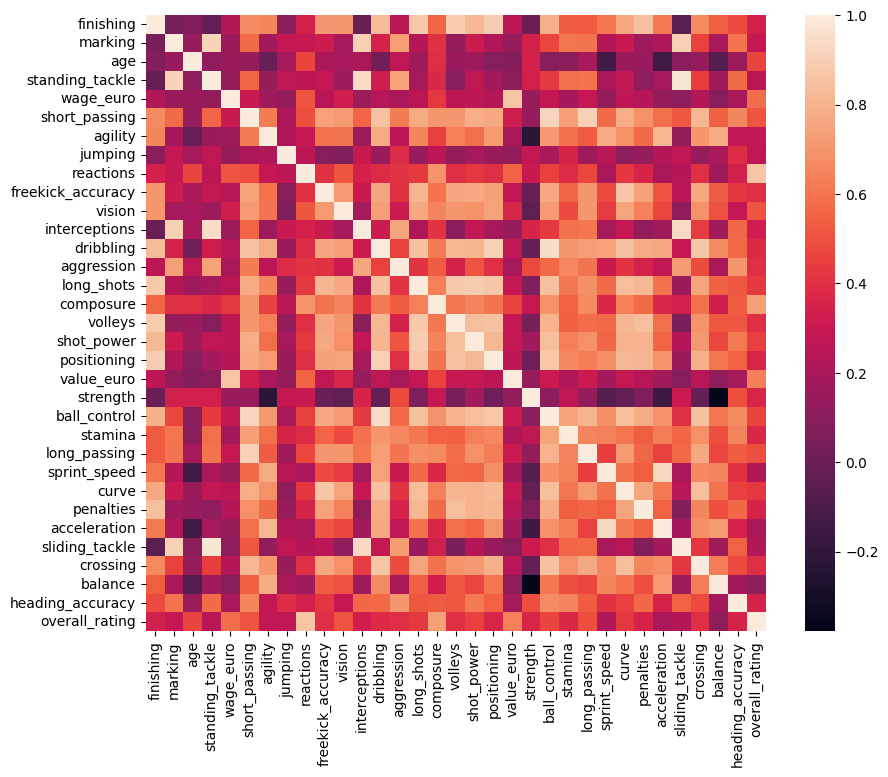

In [1911]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, fmt=".3f")

In [1912]:
unf = correlation_matrix.unstack()
so = unf.sort_values(kind="quicksort").drop_duplicates()
so = so[::-1]
so[1:20]

sliding_tackle  standing_tackle      0.975102
interceptions   standing_tackle      0.943123
ball_control    dribbling            0.941555
sliding_tackle  interceptions        0.930480
sprint_speed    acceleration         0.925894
ball_control    short_passing        0.915211
marking         standing_tackle      0.911605
dribbling       positioning          0.901588
sliding_tackle  marking              0.901557
long_passing    short_passing        0.898308
marking         interceptions        0.895978
shot_power      long_shots           0.892222
finishing       positioning          0.890102
volleys         finishing            0.886443
finishing       long_shots           0.879896
long_shots      volleys              0.871016
ball_control    positioning          0.869346
long_shots      positioning          0.863768
curve           freekick_accuracy    0.861877
dtype: float64

In [1913]:
unf = correlation_matrix.unstack()
so = unf.sort_values(kind="quicksort").drop_duplicates()
so = so[:20] 
so


balance          strength            -0.378113
strength         agility             -0.221415
acceleration     strength            -0.154648
                 age                 -0.147862
age              sprint_speed        -0.140077
                 balance             -0.081761
sprint_speed     strength            -0.071041
finishing        sliding_tackle      -0.052022
strength         vision              -0.034732
curve            strength            -0.025854
strength         dribbling           -0.021199
                 crossing            -0.020014
standing_tackle  finishing           -0.013521
agility          age                 -0.009579
strength         freekick_accuracy   -0.007446
finishing        interceptions       -0.003940
                 strength            -0.000497
strength         positioning          0.014600
age              dribbling            0.019795
strength         volleys              0.039944
dtype: float64

In [1914]:
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = new_df[numeric_columns].corr()

# Get correlations with the target variable 'overall_rating'
target_correlations = correlation_matrix['overall_rating'].sort_values(ascending=False)

# Format and print correlations
formatted_correlations = target_correlations.apply(lambda x: f"{x:.3f}")

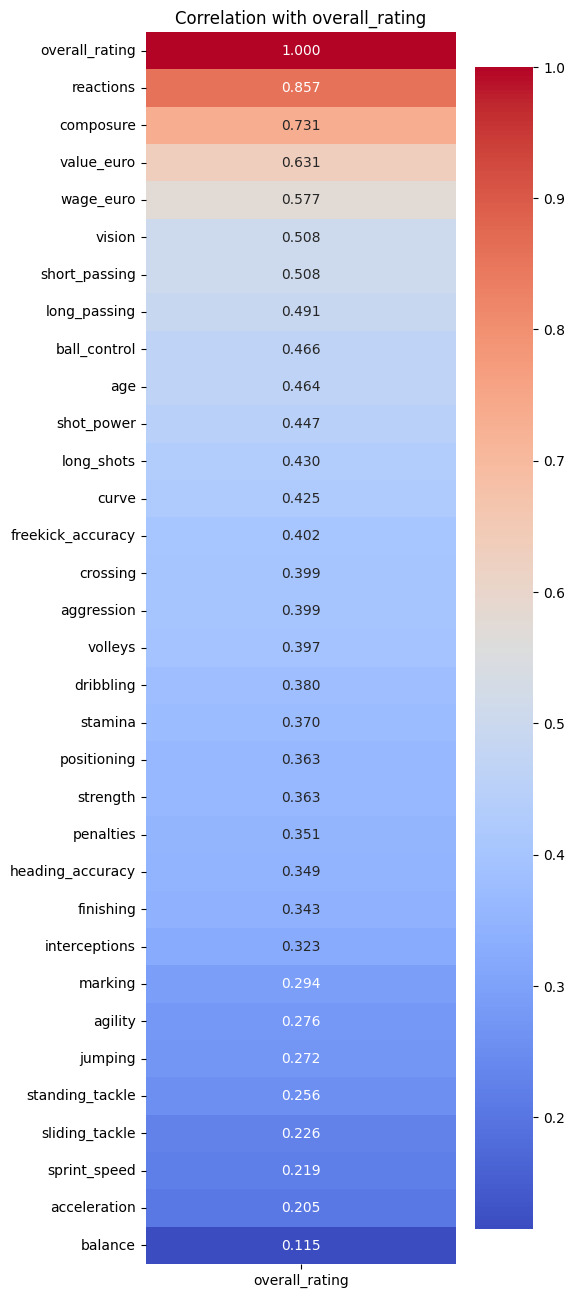

In [1915]:
correlations_with_target = correlation_matrix[['overall_rating']].sort_values(by='overall_rating', ascending=False)

plt.figure(figsize=(5, len(correlations_with_target) // 2)) 
sns.heatmap(correlations_with_target, annot=True, fmt=".3f", cmap='coolwarm', cbar=True)

plt.title("Correlation with overall_rating")
plt.show()

In [1916]:
print(correlations_with_target)

                   overall_rating
overall_rating           1.000000
reactions                0.857014
composure                0.731415
value_euro               0.630928
wage_euro                0.577478
vision                   0.508294
short_passing            0.508115
long_passing             0.490830
ball_control             0.465967
age                      0.464441
shot_power               0.446920
long_shots               0.430491
curve                    0.424808
freekick_accuracy        0.401812
crossing                 0.399181
aggression               0.398530
volleys                  0.397413
dribbling                0.379939
stamina                  0.370494
positioning              0.363150
strength                 0.362575
penalties                0.351300
heading_accuracy         0.348855
finishing                0.343103
interceptions            0.323358
marking                  0.293862
agility                  0.276214
jumping                  0.271670
standing_tackl

### 1b. PCA to remove certain correlations within the dataset

In [1917]:
X.columns

Index(['finishing', 'marking', 'age', 'standing_tackle', 'wage_euro',
       'short_passing', 'agility', 'jumping', 'reactions', 'freekick_accuracy',
       'vision', 'interceptions', 'dribbling', 'aggression', 'long_shots',
       'composure', 'volleys', 'shot_power', 'positioning', 'value_euro',
       'strength', 'ball_control', 'stamina', 'long_passing', 'sprint_speed',
       'curve', 'penalties', 'acceleration', 'sliding_tackle', 'crossing',
       'balance', 'heading_accuracy'],
      dtype='object')

In [1918]:
covariance_matrix = np.cov(X.T)

covariance_matrix


array([[ 0.04451784,  0.00196185,  0.00264812, ...,  0.02939674,
         0.01992198,  0.01978049],
       [ 0.00196185,  0.04834523,  0.00530838, ...,  0.02111821,
         0.00768945,  0.02536473],
       [ 0.00264812,  0.00530838,  0.02623249, ...,  0.00462747,
        -0.00234724,  0.00488774],
       ...,
       [ 0.02939674,  0.02111821,  0.00462747, ...,  0.04402583,
         0.02324539,  0.01969608],
       [ 0.01992198,  0.00768945, -0.00234724, ...,  0.02324539,
         0.03141801,  0.00641832],
       [ 0.01978049,  0.02536473,  0.00488774, ...,  0.01969608,
         0.00641832,  0.037801  ]])

In [1919]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [1920]:
sorted_indices = np.argsort(eigenvalues)[::-1] 
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [1921]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

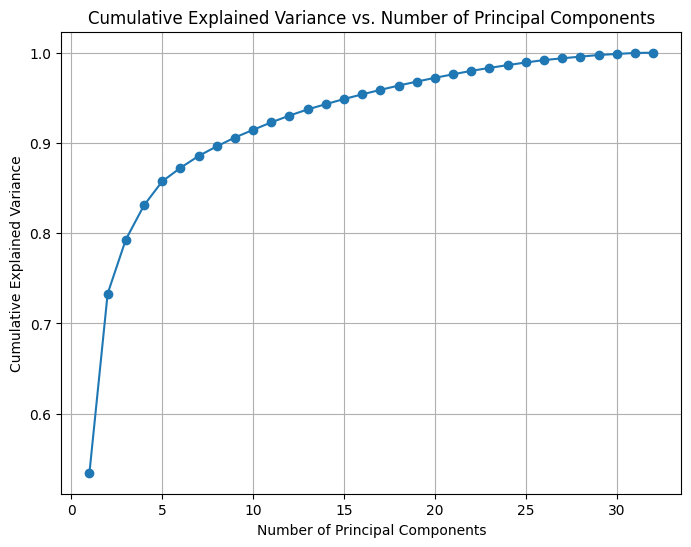

In [1922]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

Explained Variance Ratio: [0.53451145 0.19844997 0.05996554 0.03793266 0.02652988]

Sorted Feature Loadings (Top Features Based on PC1):
                        PC1       PC2       PC3       PC4       PC5  \
dribbling          0.246103 -0.101710 -0.094026  0.024827 -0.085934   
crossing           0.241960 -0.030407 -0.129720 -0.174383  0.036494   
long_shots         0.240009 -0.150767  0.142445 -0.047225 -0.089129   
positioning        0.239510 -0.159424  0.024504  0.085460 -0.062330   
curve              0.238545 -0.112741  0.012257 -0.212393 -0.019350   
ball_control       0.229233 -0.037458 -0.008207  0.022877 -0.075739   
volleys            0.215263 -0.181733  0.155449  0.038610 -0.093070   
finishing          0.212893 -0.234112  0.125518  0.119155 -0.132947   
shot_power         0.208814 -0.084721  0.164341  0.046661 -0.131136   
short_passing      0.207399  0.026344  0.013559 -0.086737 -0.052245   
freekick_accuracy  0.205444 -0.082292  0.068960 -0.280227 -0.051935   
long_passin

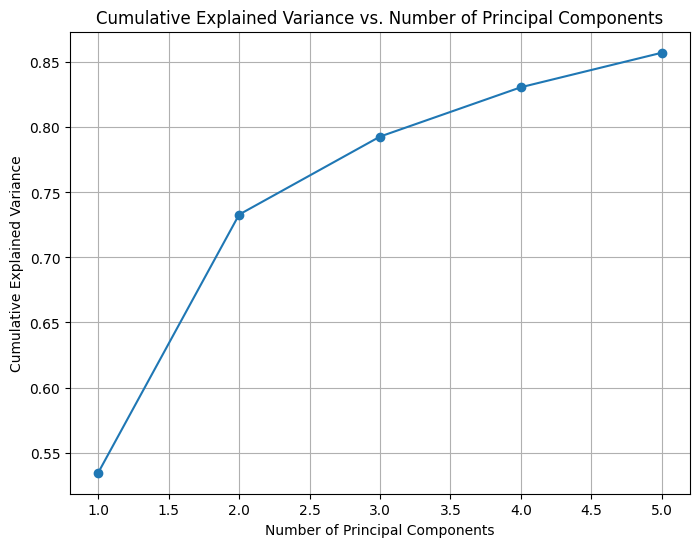

In [1963]:
from sklearn.decomposition import PCA

pca_check = new_df.drop('overall_rating', axis=1)

optimal_k =5

pca = PCA(n_components=optimal_k)  
X_pca = pca.fit_transform(pca_check)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

loadings = pca.components_

df_loadings = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=pca_check.columns)

df_loadings['abs_loading'] = df_loadings['PC1'].abs()
df_loadings = df_loadings.sort_values('abs_loading', ascending=False)

print("\nSorted Feature Loadings (Top Features Based on PC1):")
print(df_loadings)

top_features = df_loadings.head(optimal_k).index
print(f"\nTop {optimal_k} Features based on PCA loadings:", top_features)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

Keeping all the valuable columns and checking for new correlations

In [1964]:
eda_df = pd.concat([new_df], axis=1)
eda_df

,finishing,marking,age,standing_tackle,wage_euro,short_passing,agility,jumping,reactions,freekick_accuracy,...,long_passing,sprint_speed,curve,penalties,acceleration,sliding_tackle,crossing,balance,heading_accuracy,overall_rating
0,1.000000,0.329670,0.482759,0.285714,1.000000,0.988372,0.964706,0.6625,0.986111,1.000000,...,0.952381,0.880952,0.988636,0.804598,0.929412,0.264368,0.920455,0.9875,0.733333,94
1,0.849462,0.615385,0.344828,0.604396,0.361702,0.976744,0.811765,0.4375,0.888889,0.923077,...,0.952381,0.726190,0.909091,0.712644,0.752941,0.218391,0.943182,0.8125,0.533333,88
2,0.784946,0.659341,0.275862,0.714286,0.450355,0.918605,0.764706,0.8500,0.805556,0.868132,...,0.964286,0.797619,0.897727,0.885057,0.694118,0.735632,0.852273,0.6250,0.788889,88
3,0.806452,0.527473,0.344828,0.241758,0.290780,0.906977,0.976471,0.4750,0.819444,0.813187,...,0.821429,0.880952,0.920455,0.643678,0.964706,0.218391,0.920455,0.9625,0.577778,88
4,0.215054,0.967033,0.344828,0.945055,0.237589,0.709302,0.458824,0.8250,0.805556,0.274725,...,0.607143,0.750000,0.250000,0.321839,0.682353,0.965517,0.284091,0.3000,0.877778,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17694,0.634409,0.406593,0.275862,0.197802,0.003546,0.686047,0.964706,0.7750,0.541667,0.483516,...,0.619048,0.880952,0.534091,0.666667,0.835294,0.172414,0.590909,0.8250,0.622222,67
17695,0.182796,0.549451,0.206897,0.681319,0.000000,0.558140,0.505882,0.7375,0.361111,0.274725,...,0.404762,0.619048,0.227273,0.310345,0.682353,0.655172,0.511364,0.4625,0.544444,59
17696,0.075269,0.065934,0.172414,0.109890,0.000000,0.220930,0.211765,0.3500,0.333333,0.098901,...,0.178571,0.119048,0.079545,0.126437,0.176471,0.114943,0.068182,0.2750,0.100000,59
17697,0.623656,0.142857,0.137931,0.175824,0.005319,0.488372,0.635294,0.5375,0.402778,0.395604,...,0.333333,0.880952,0.465909,0.517241,0.847059,0.160920,0.420455,0.7125,0.566667,59


In [1965]:
print(len(new_df), len(y), len(eda_df))

17699 17699 17699


#### Data correlation with respect to PCA columns

In [1969]:
pca_df = pd.DataFrame(pd.concat([eda_df[top_features], y], axis=1))



In [1970]:
print(len(new_df), len(y), len(eda_df))
pca_df

17699 17699 17699


,dribbling,crossing,long_shots,positioning,curve,overall_rating
0,1.000000,0.920455,1.000000,0.989247,0.988636,94
1,0.860215,0.943182,0.945055,0.881720,0.909091,88
2,0.892473,0.852273,0.868132,0.860215,0.897727,88
3,0.924731,0.920455,0.890110,0.870968,0.920455,88
4,0.698925,0.284091,0.131868,0.236559,0.250000,88
...,...,...,...,...,...,...
17694,0.645161,0.590909,0.560440,0.623656,0.534091,67
17695,0.516129,0.511364,0.208791,0.430108,0.227273,59
17696,0.086022,0.068182,0.065934,0.032258,0.079545,59
17697,0.569892,0.420455,0.604396,0.559140,0.465909,59


In [1971]:
correlations = pca_df.corr()['overall_rating'].drop('overall_rating')

# Display the correlations
print(correlations)



dribbling      0.379939
crossing       0.399181
long_shots     0.430491
positioning    0.363150
curve          0.424808
Name: overall_rating, dtype: float64


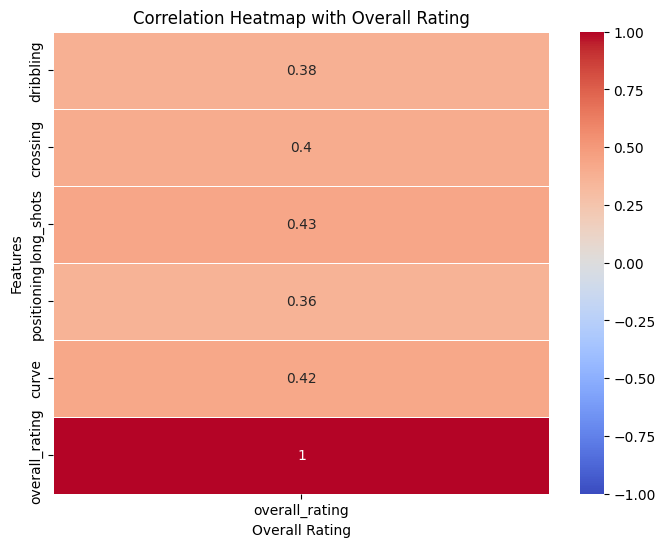

In [1973]:

correlations = pca_df.corr()

# Extract the correlation of all features with 'overall_rating' and reshape to 2D
correlations_with_overall = correlations[['overall_rating']]

# Set up the plot size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlations_with_overall, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap with Overall Rating')
plt.ylabel('Features')
plt.xlabel('Overall Rating')

# Display the plot
plt.show()


### 2. How is the data distributed?

#### 2a. How is the general distribution of data whilst respecting PCA results?

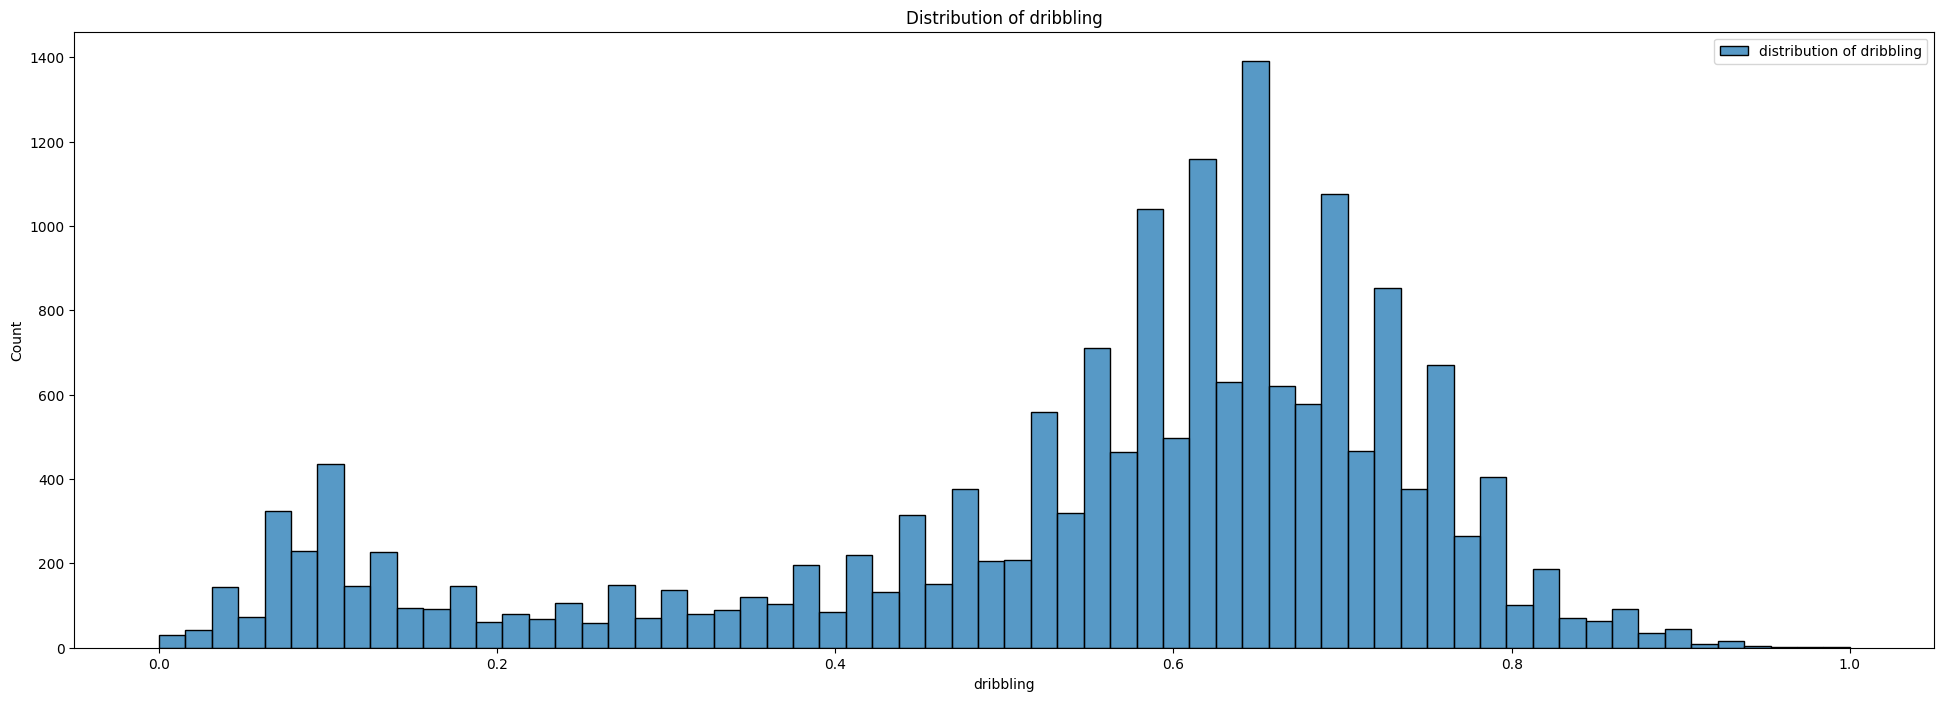

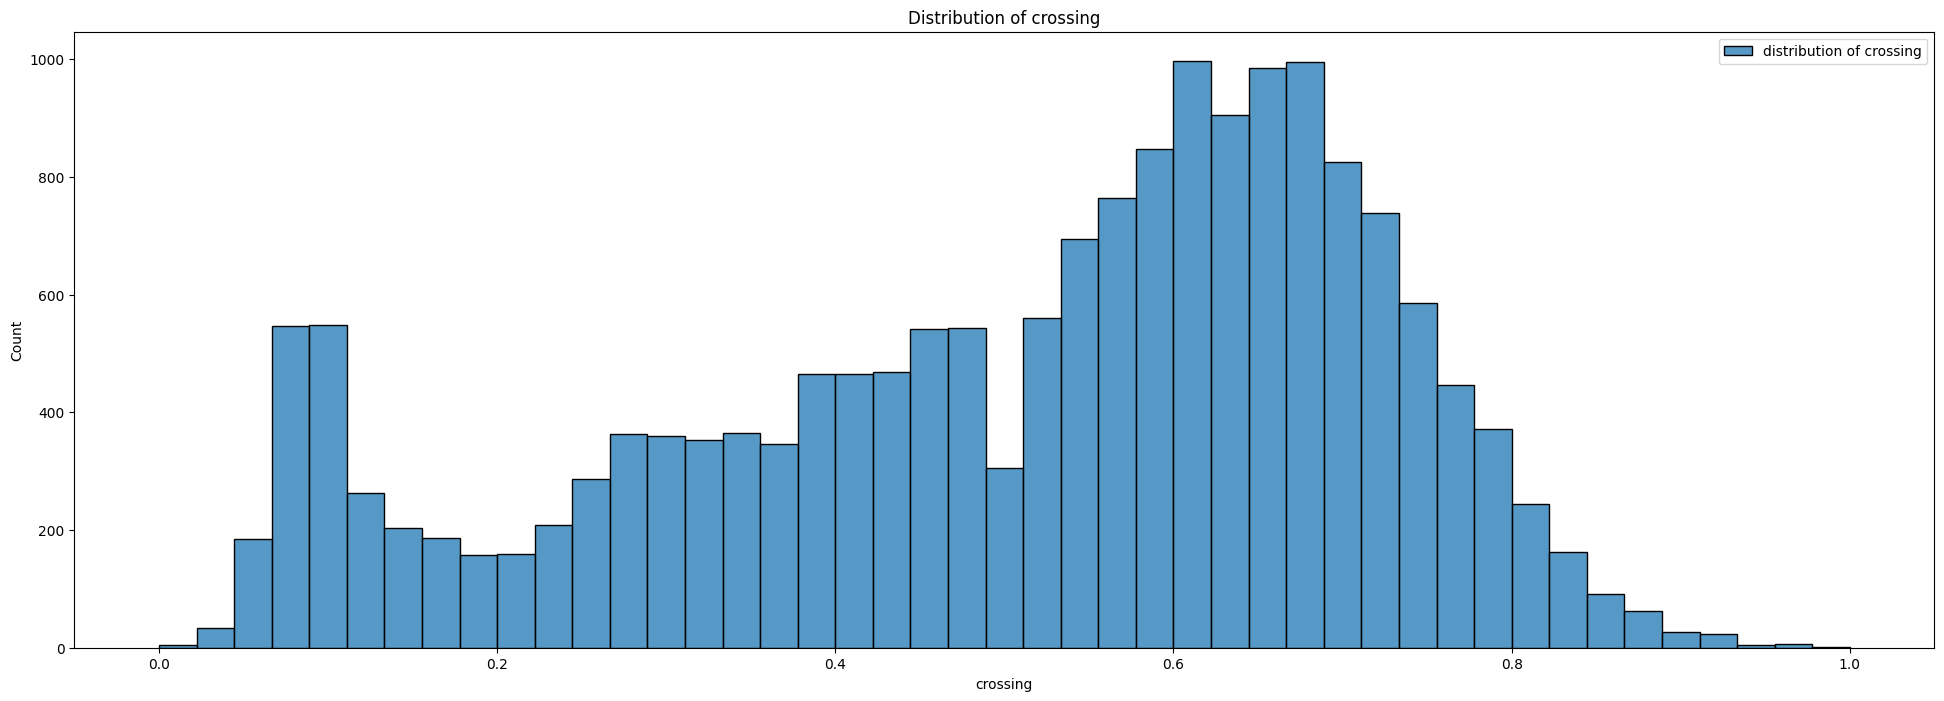

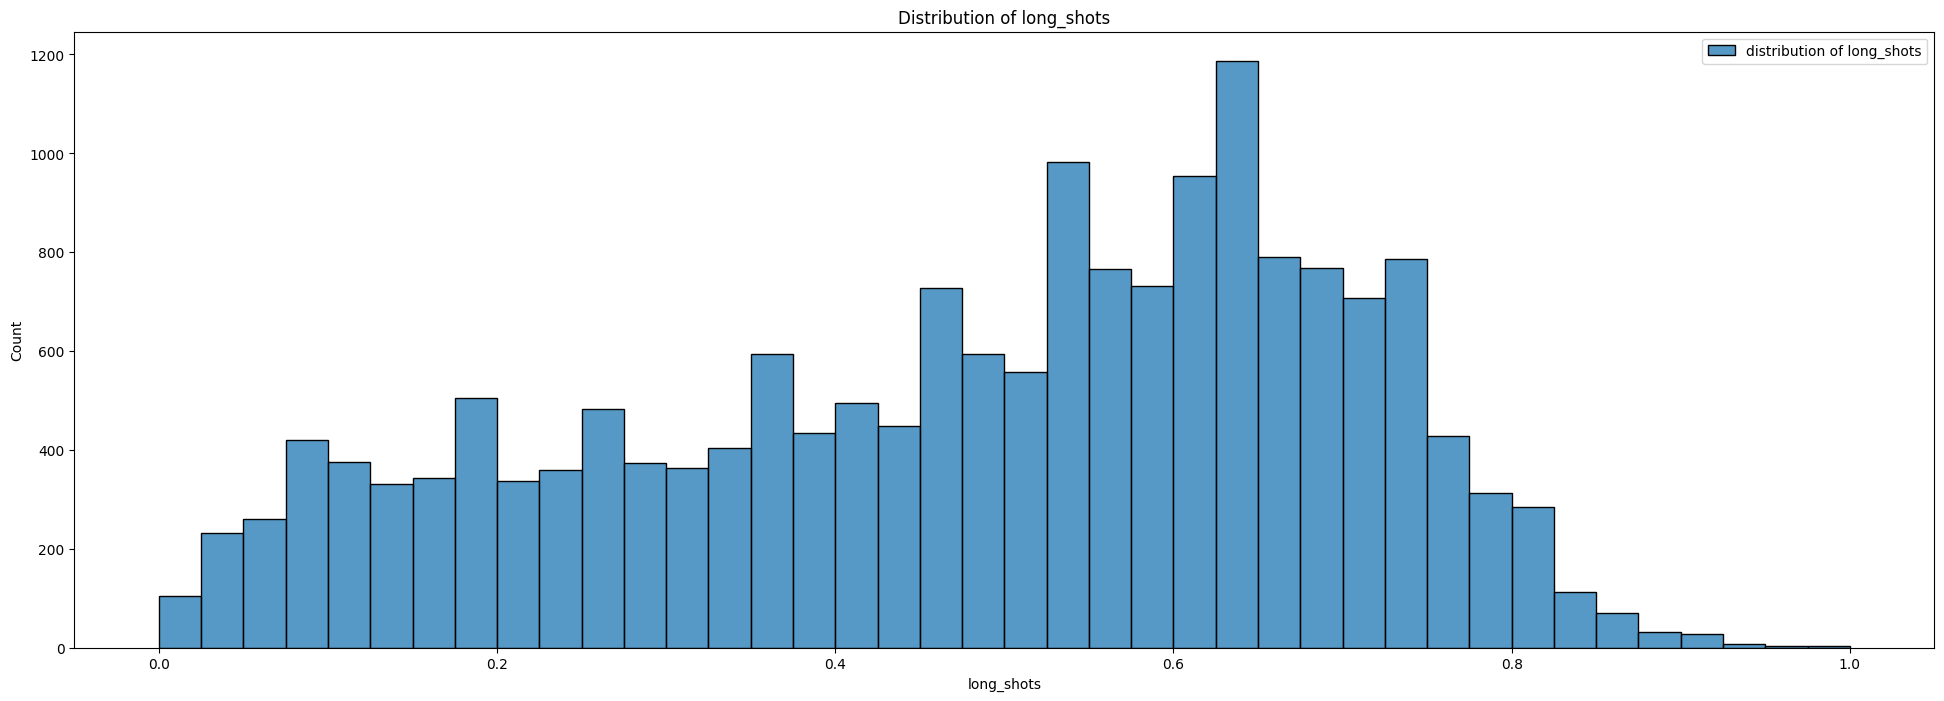

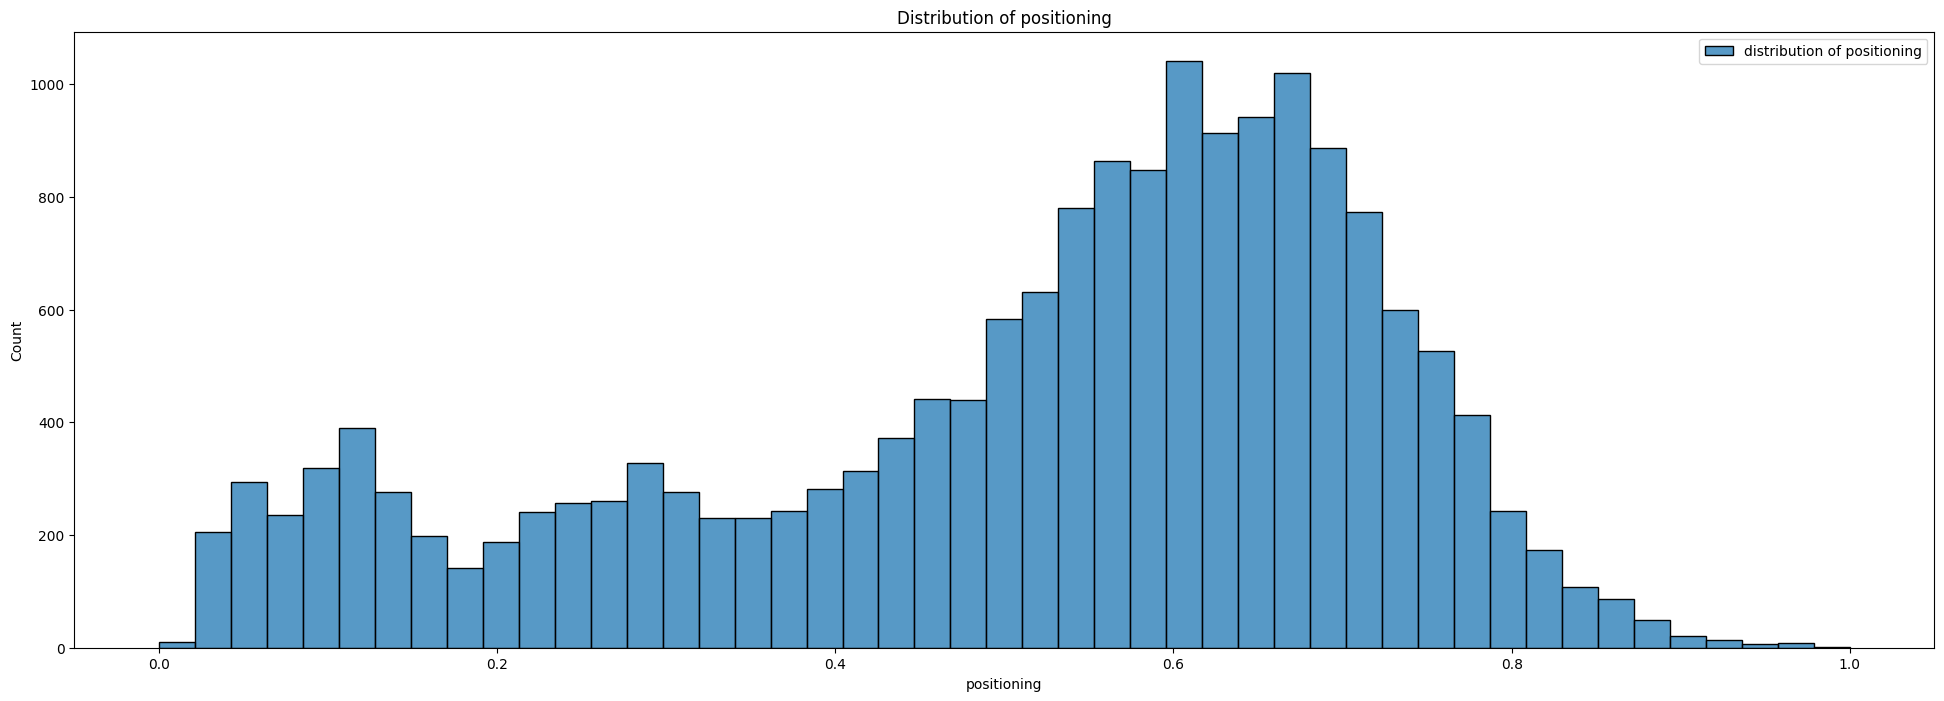

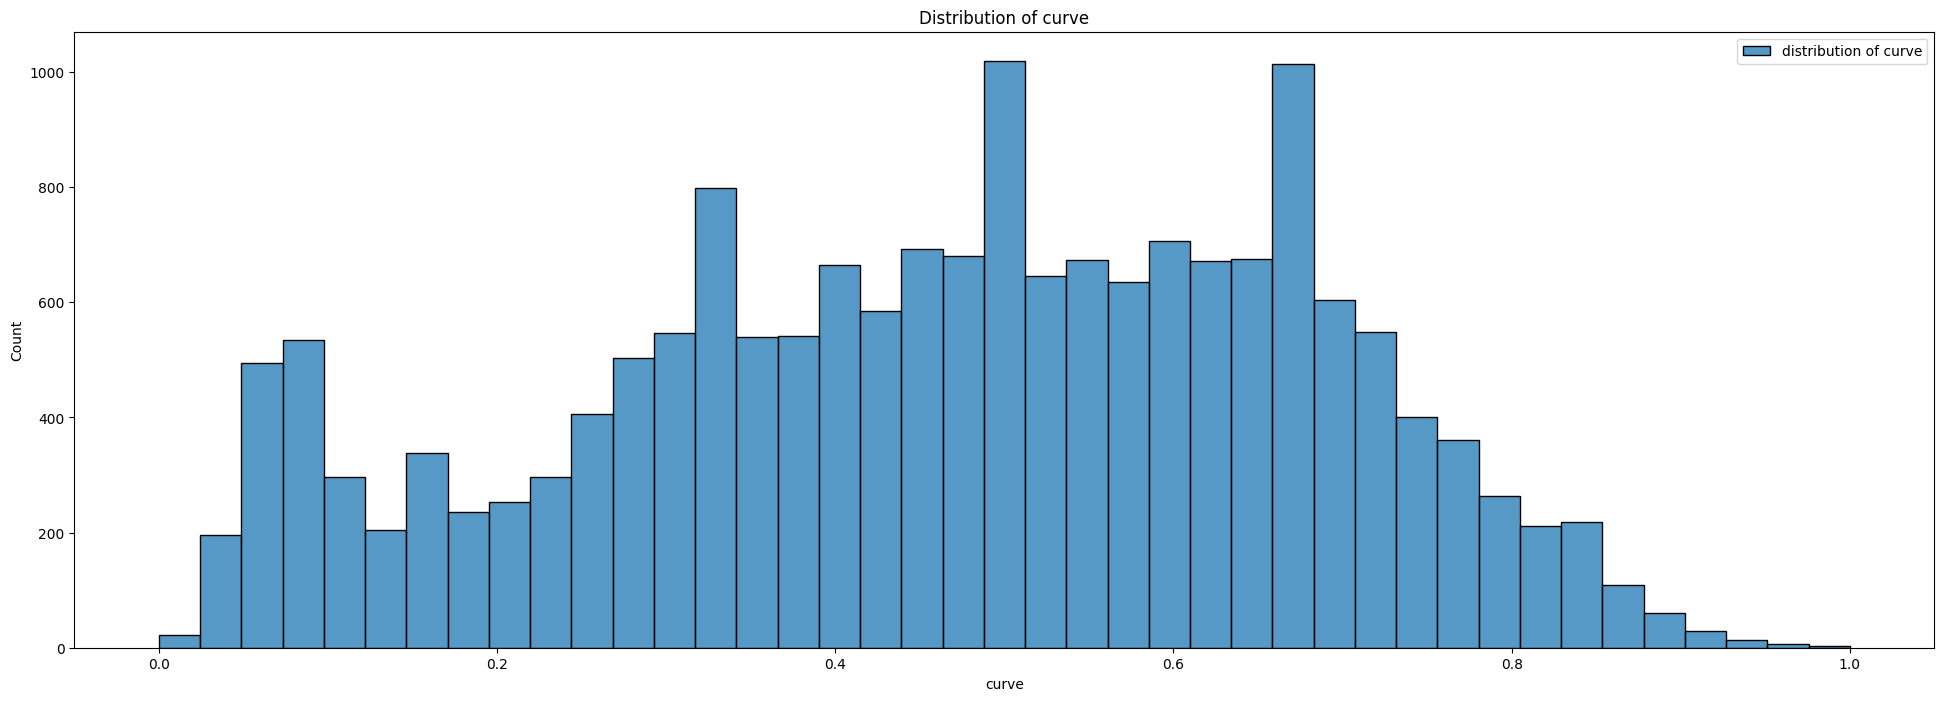

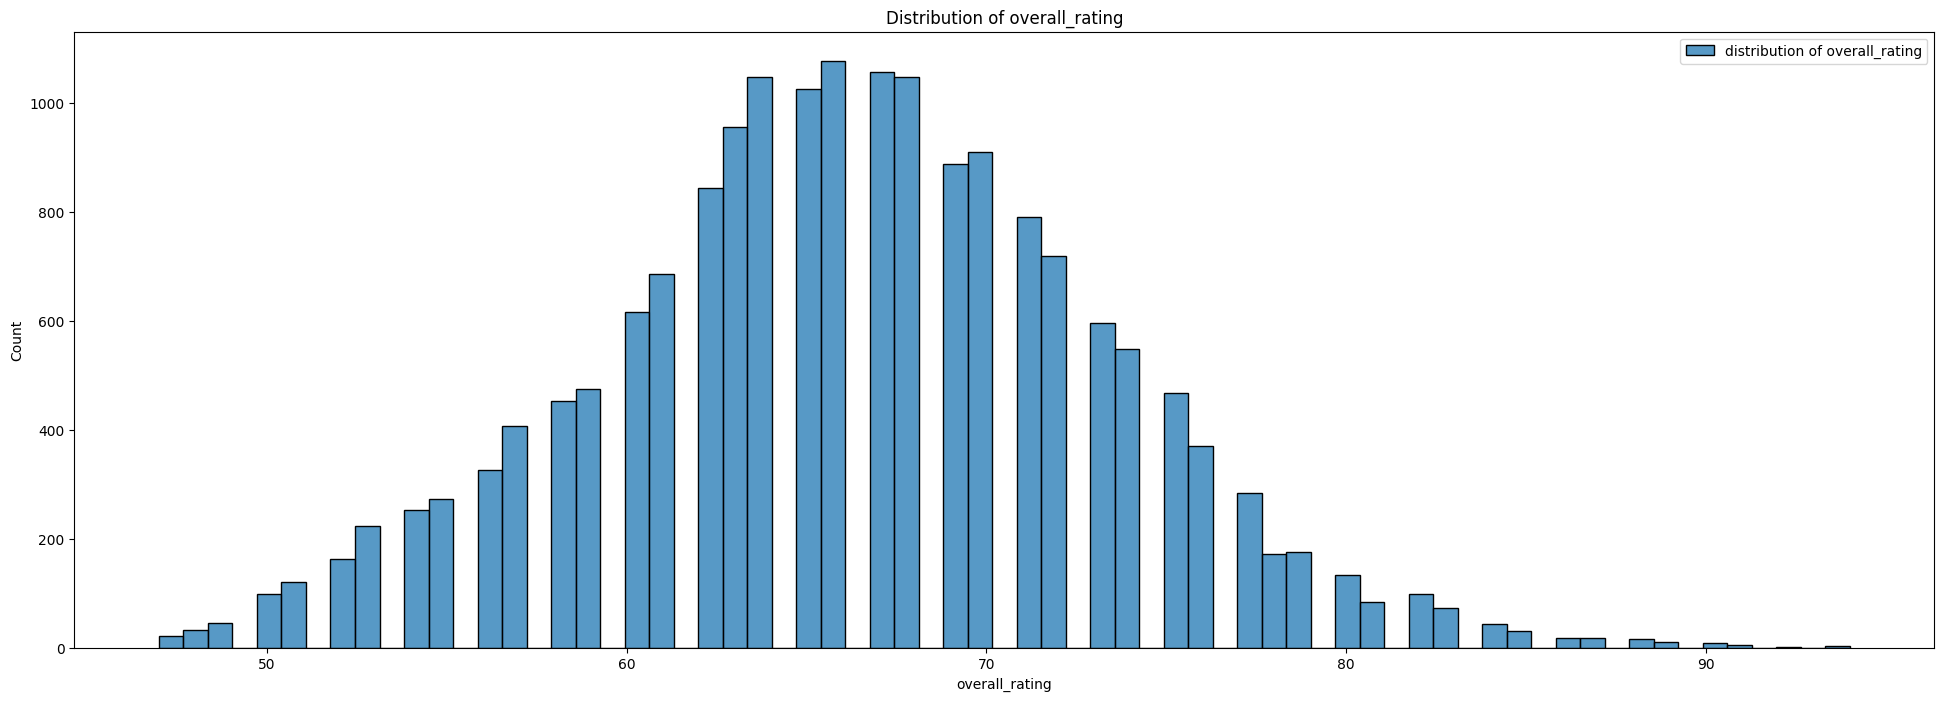

In [1974]:
for column in pca_df.columns:
    plt.figure(figsize=(24, 8))
    sns.histplot(x=pca_df[column], label=f'distribution of {column}')
    plt.xlabel(column)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()
    plt.close()



#### 2b. How is the distribution of low variance data with respect to the overall_rating


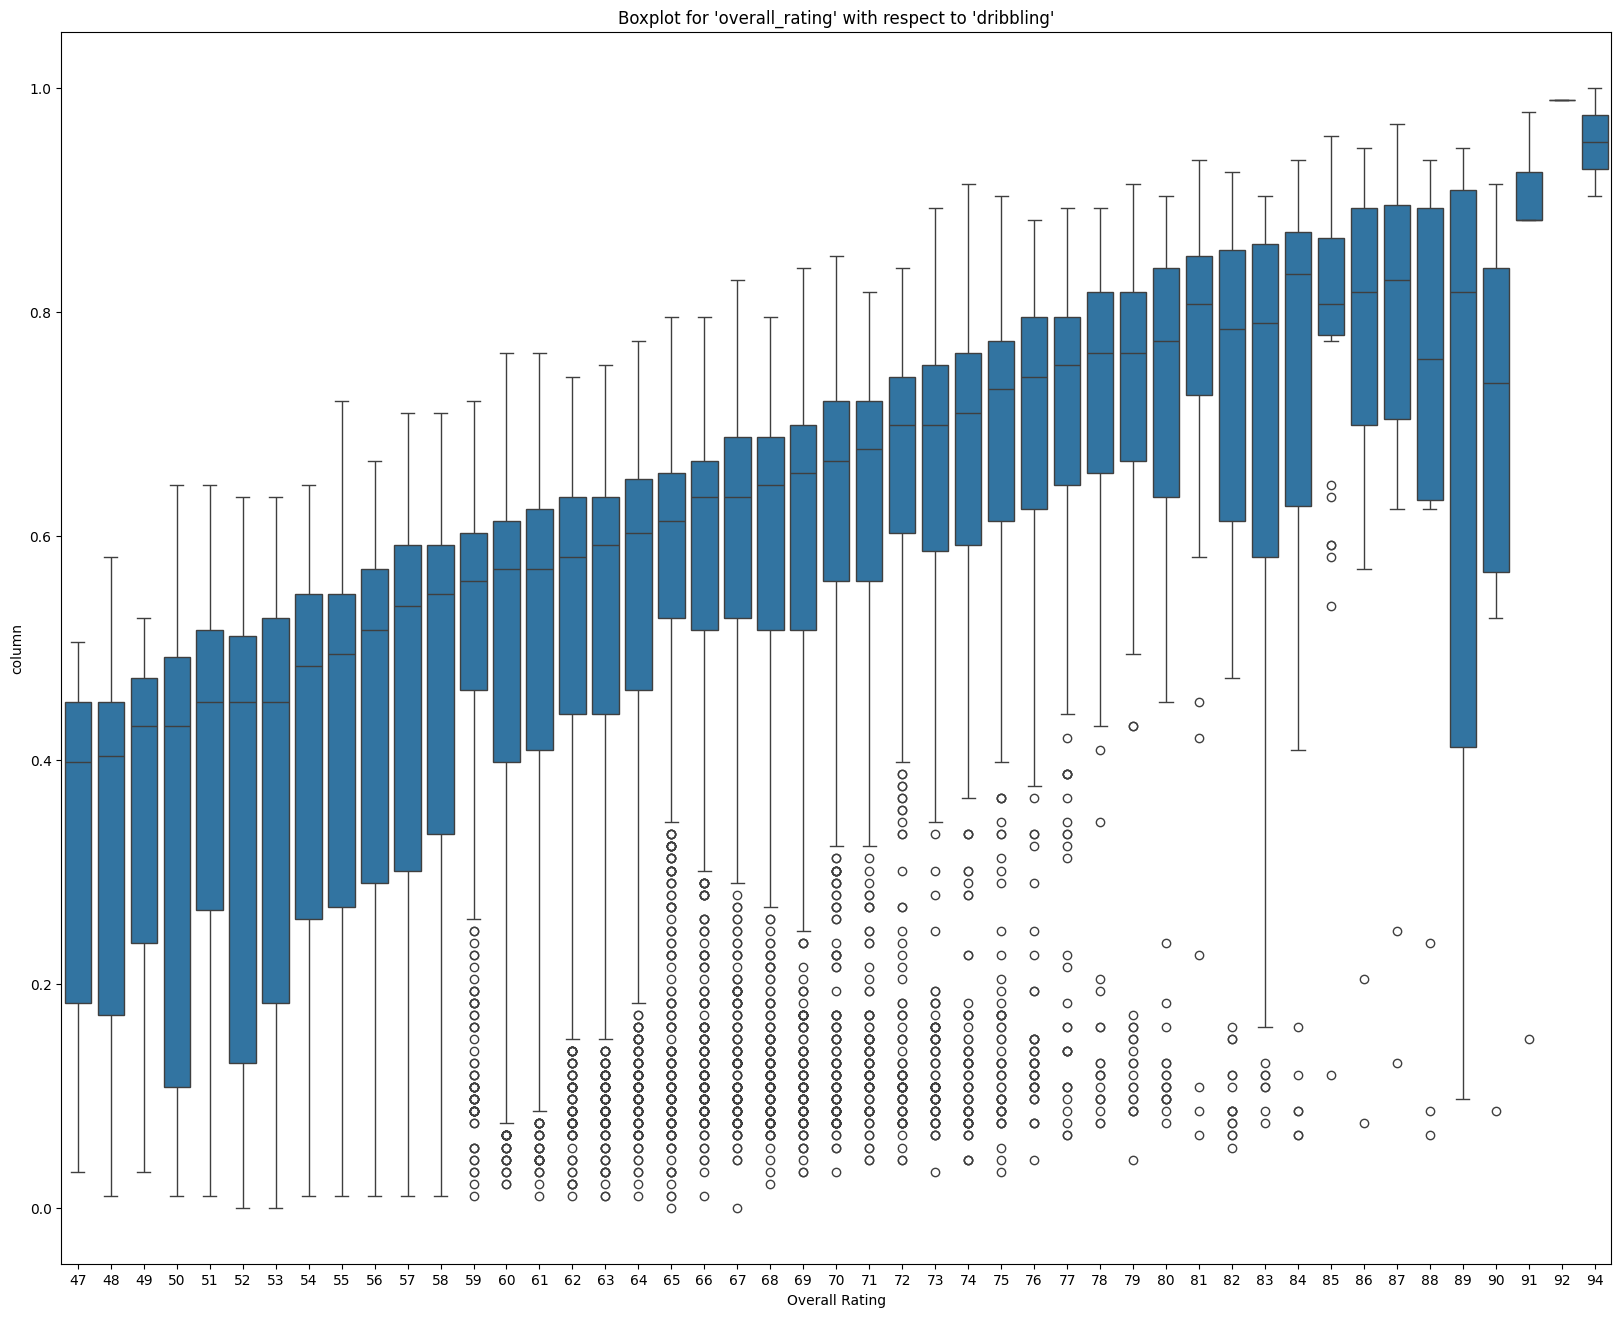

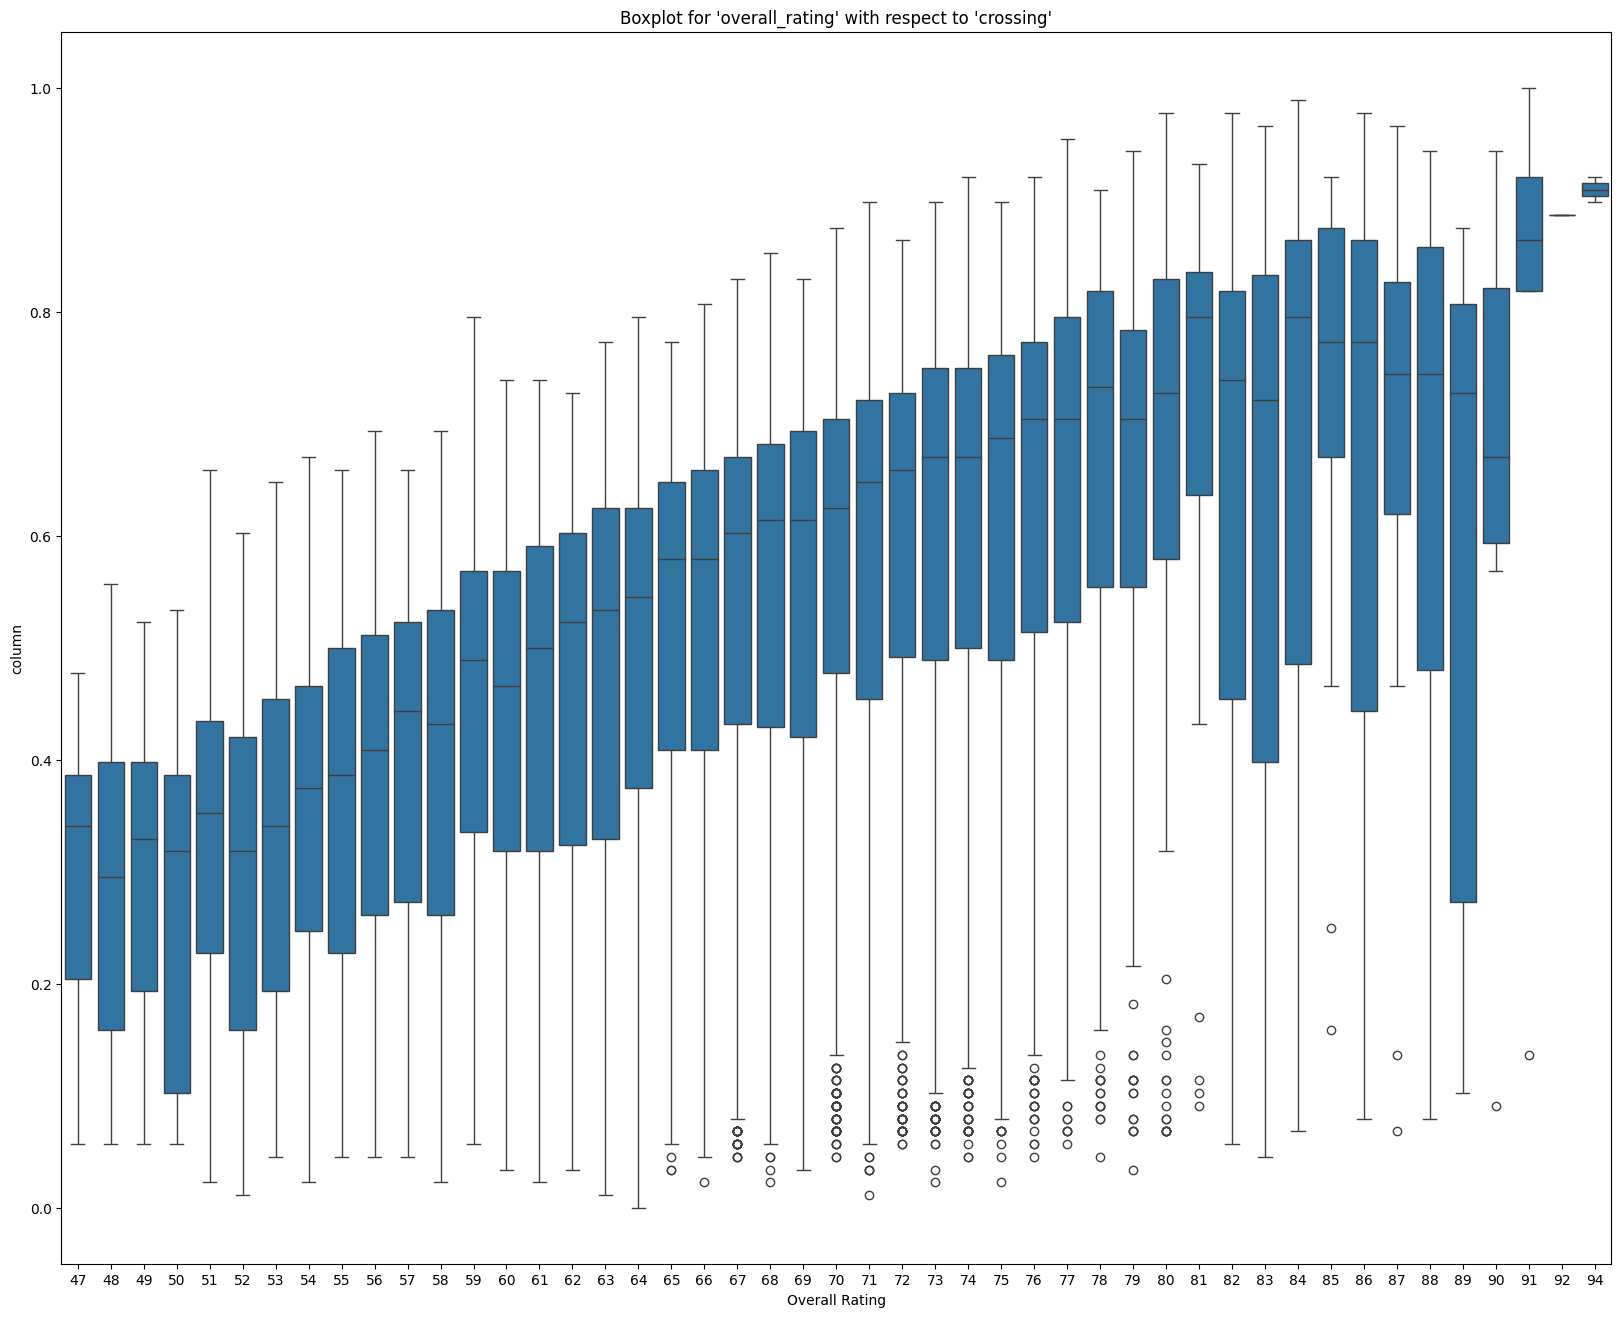

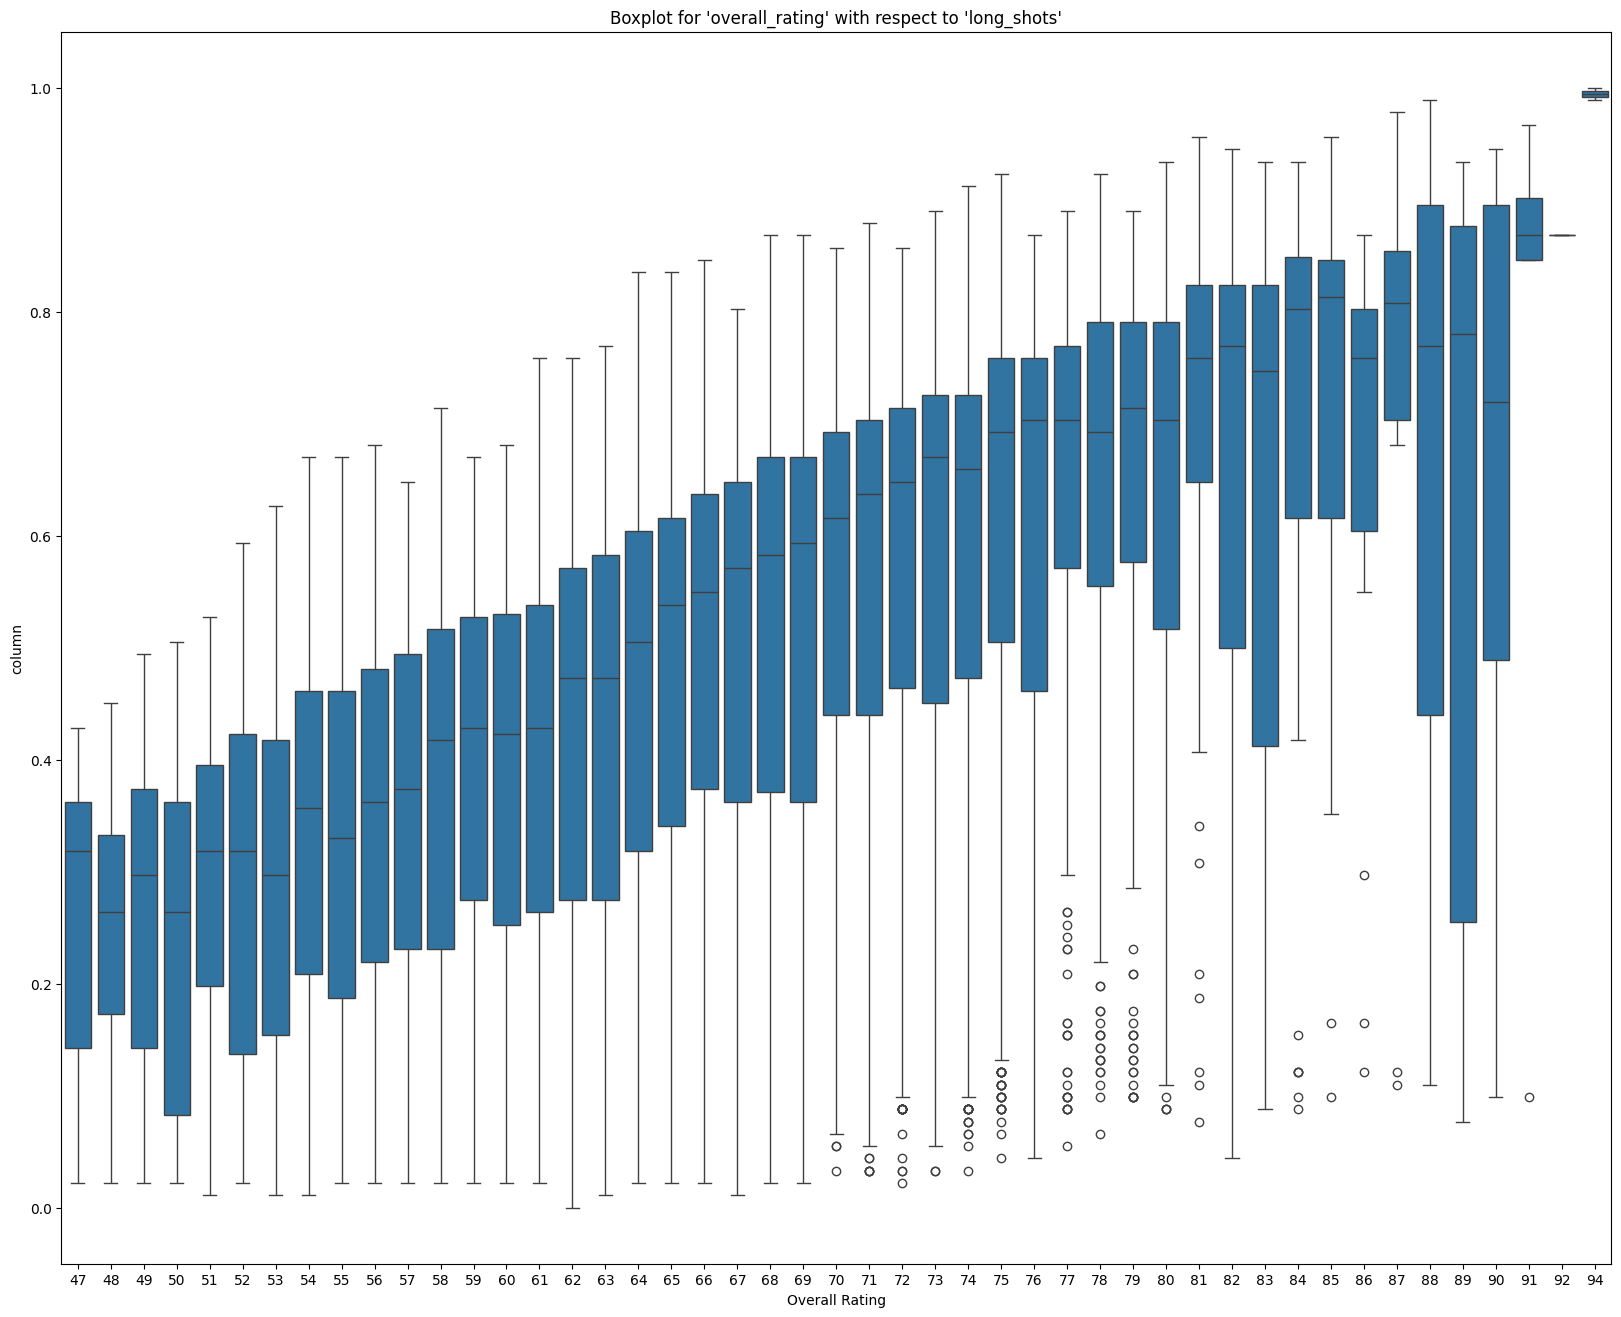

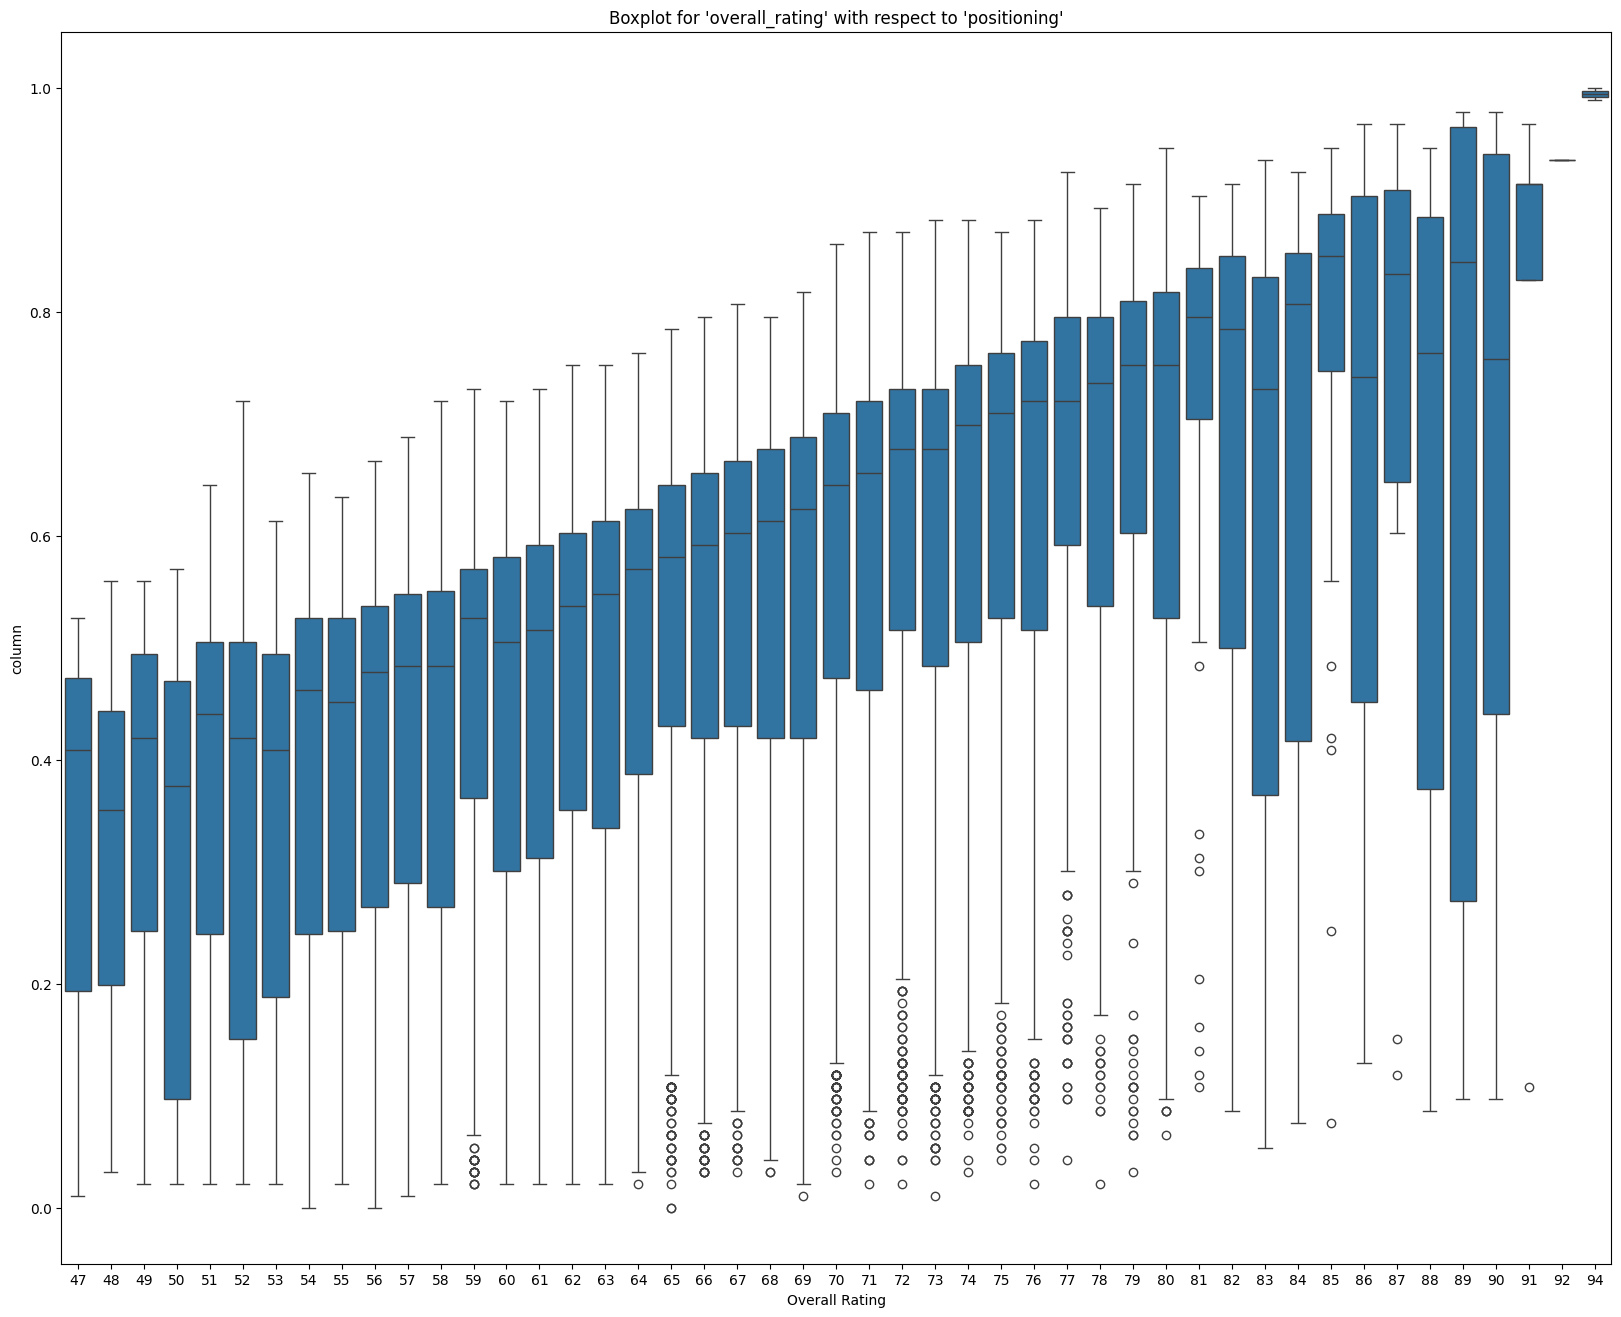

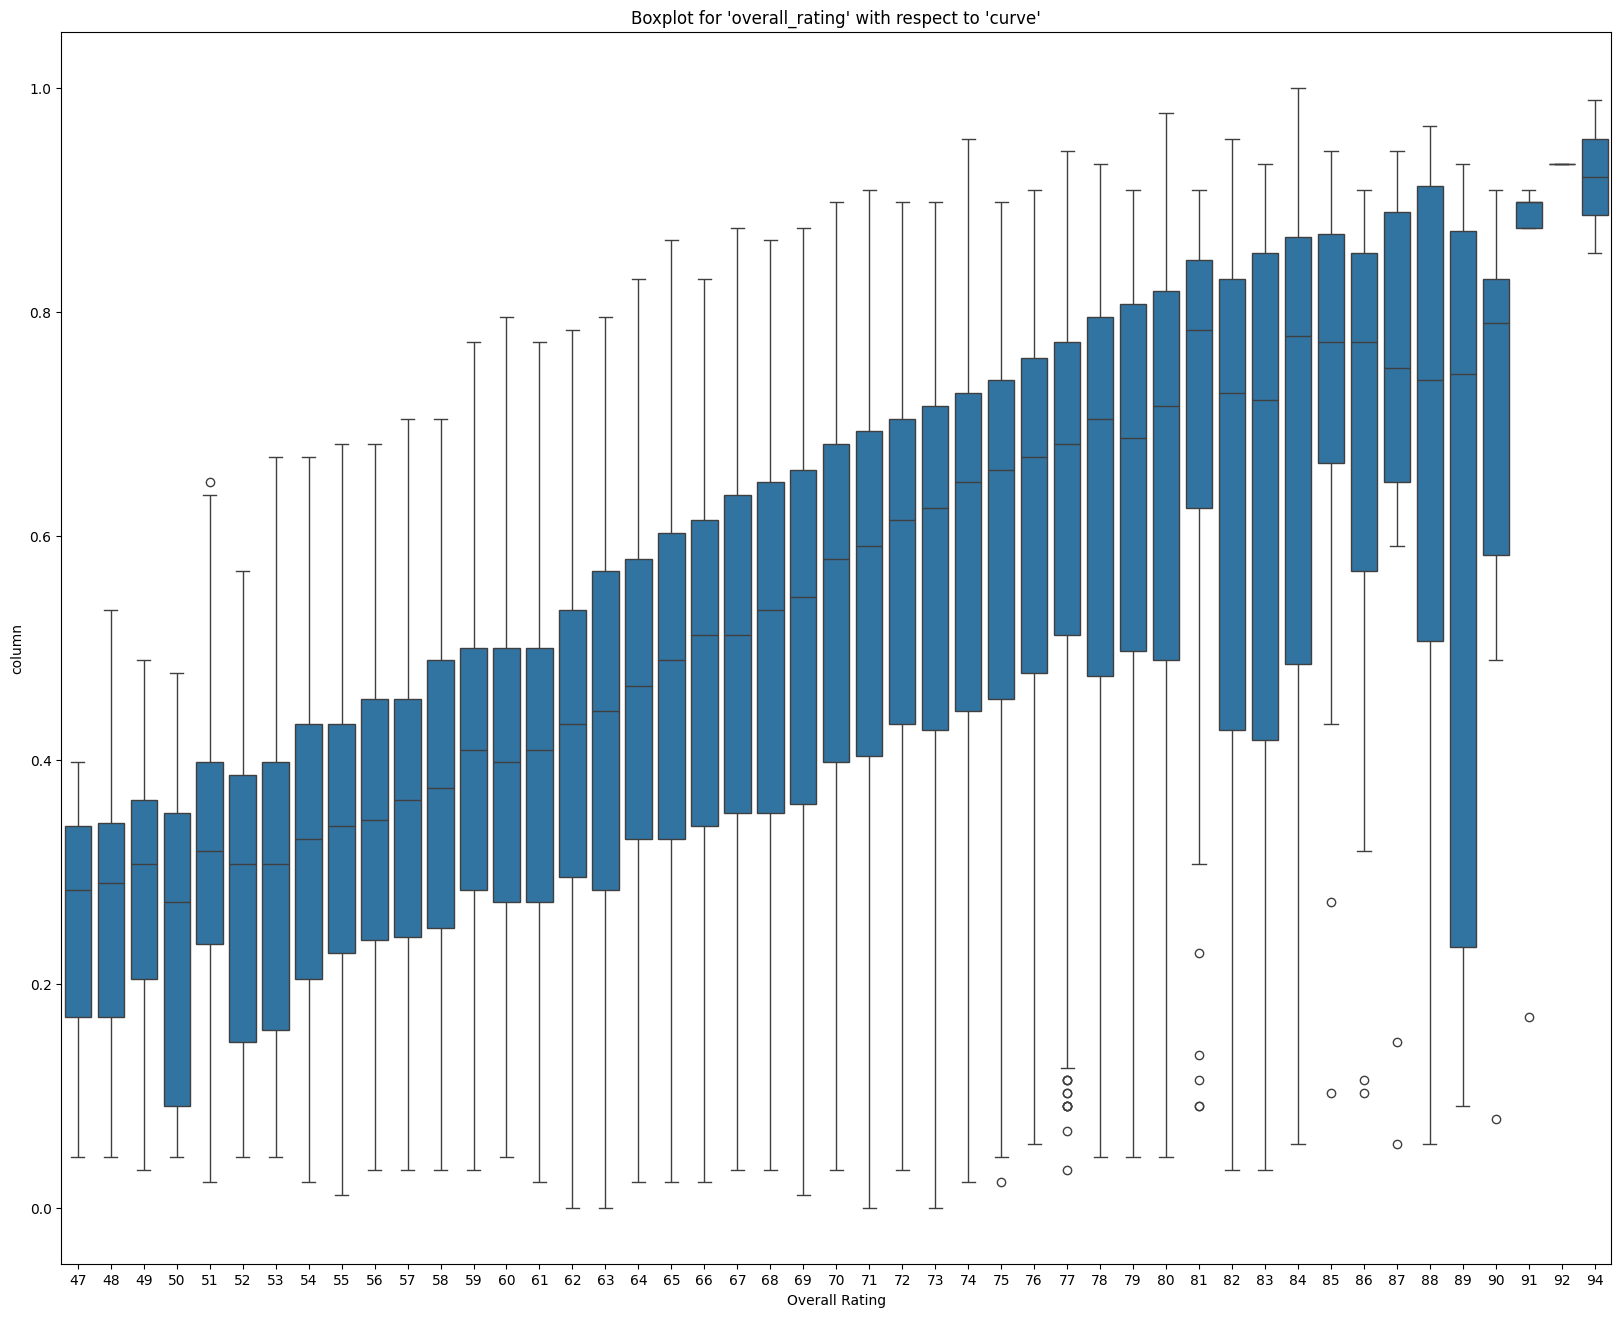

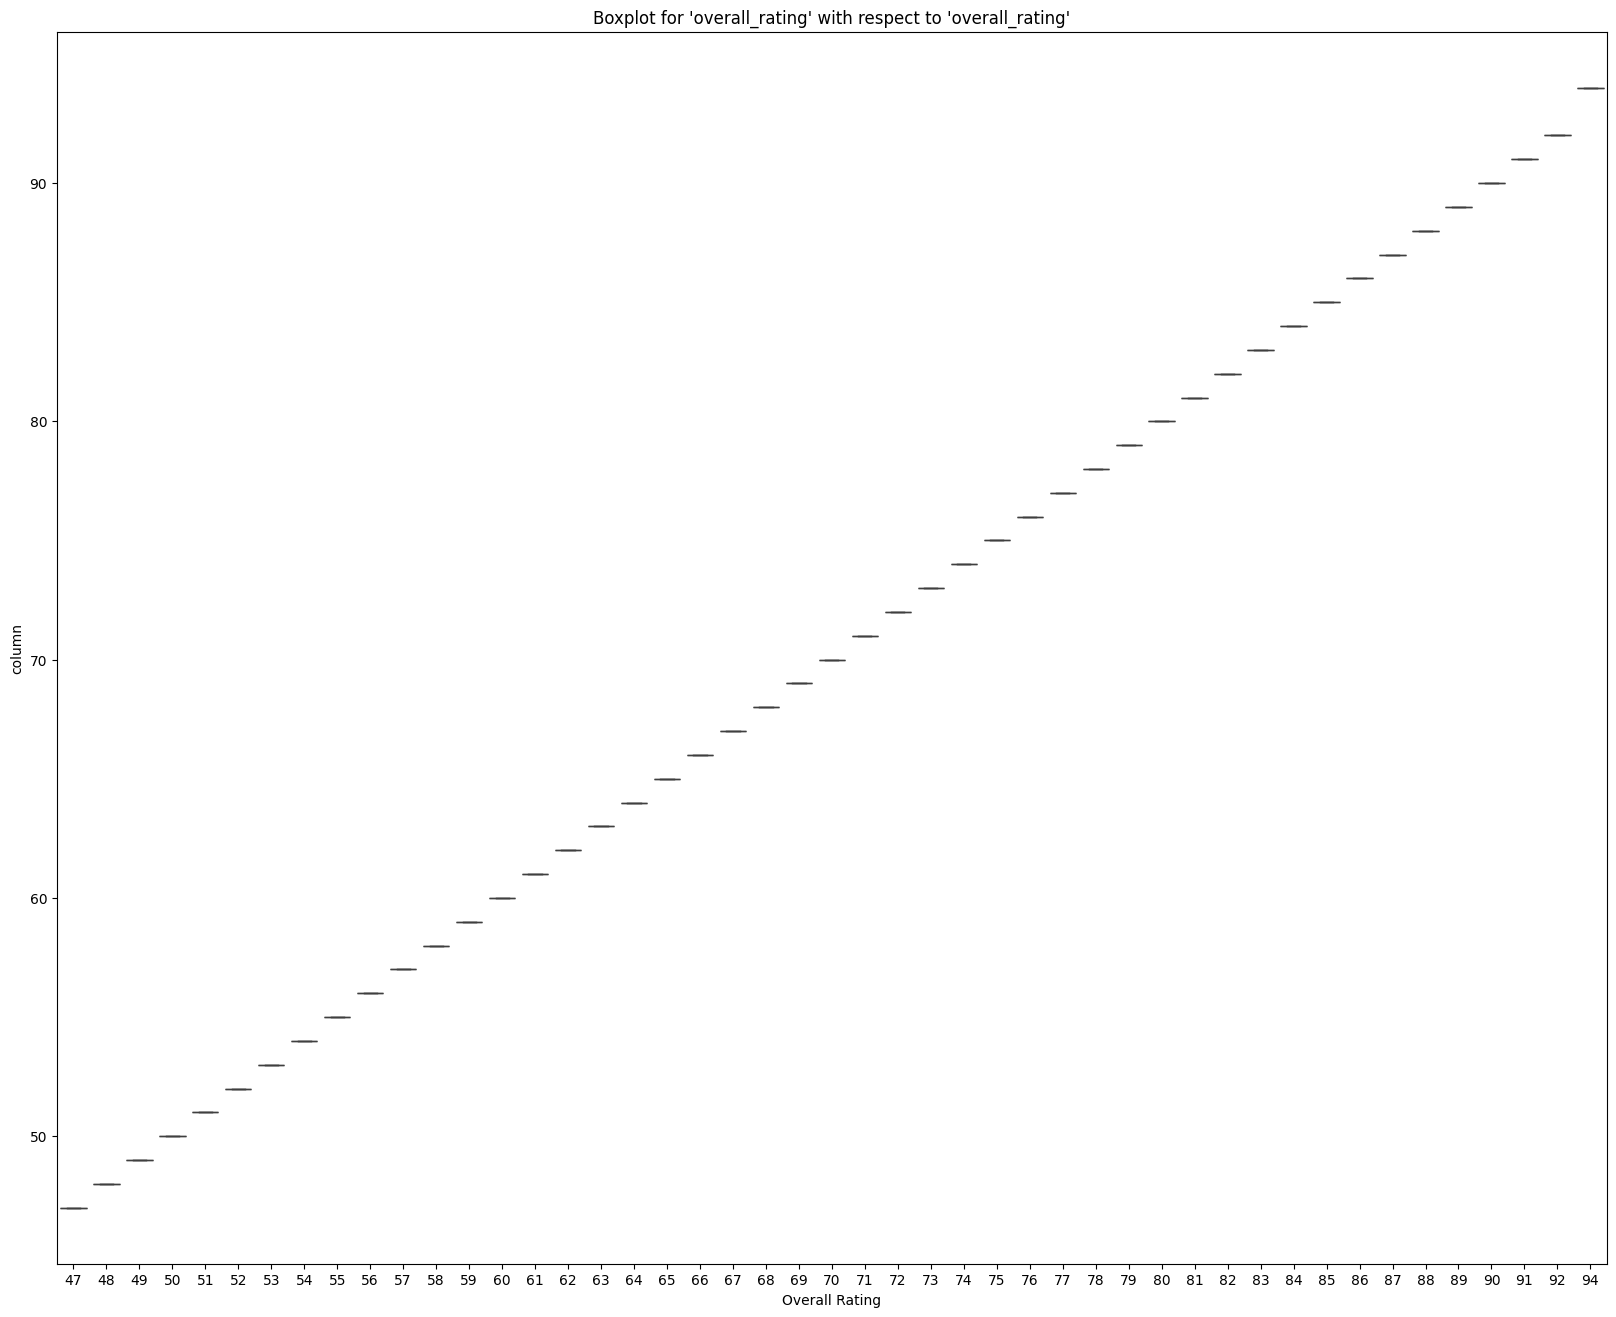

In [1975]:
for column in pca_df.columns:

    try:
        plt.figure(figsize=(20, 16))
        sns.boxplot(data=pca_df, x='overall_rating', y=column)
        plt.title(f"Boxplot for 'overall_rating' with respect to '{column}'")
        plt.xlabel('Overall Rating')
        plt.ylabel('column')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

#### 2c. How is the distribution of highly correlated data

In [1976]:
corr_df = eda_df[['reactions', 'composure', 'value_euro', 'overall_rating']]

corr_df

,reactions,composure,value_euro,overall_rating
0,0.986111,1.000000,1.000000,94
1,0.888889,0.904762,0.628926,88
2,0.805556,0.892857,0.660603,88
3,0.819444,0.845238,0.561046,88
4,0.805556,0.809524,0.542945,88
...,...,...,...,...
17694,0.541667,0.523810,0.008734,67
17695,0.361111,0.476190,0.001629,59
17696,0.333333,0.416667,0.001448,59
17697,0.402778,0.488095,0.002444,59


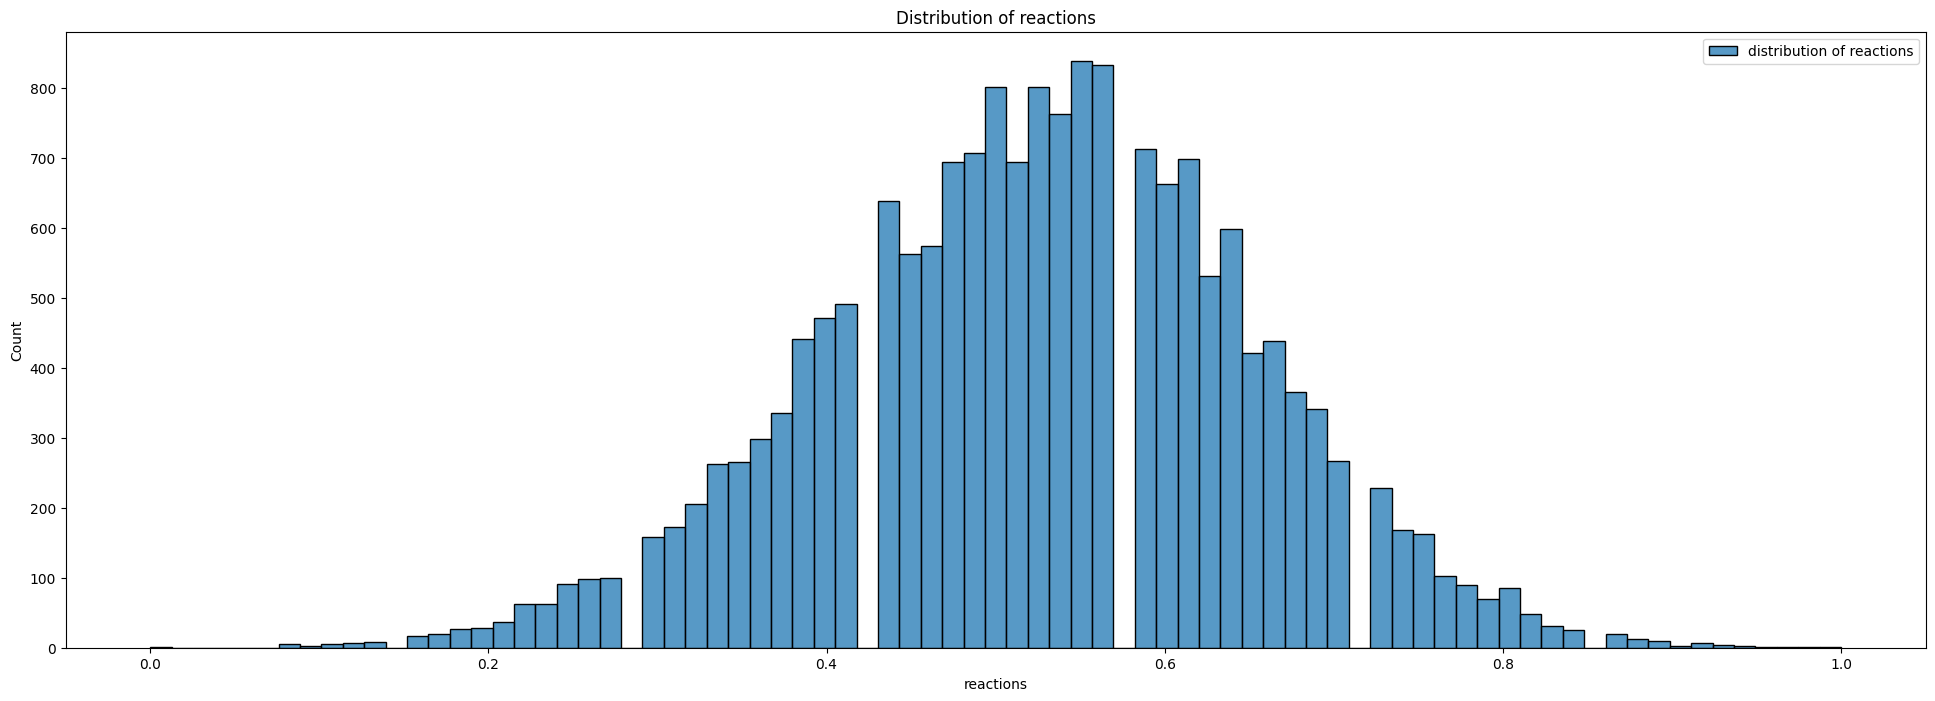

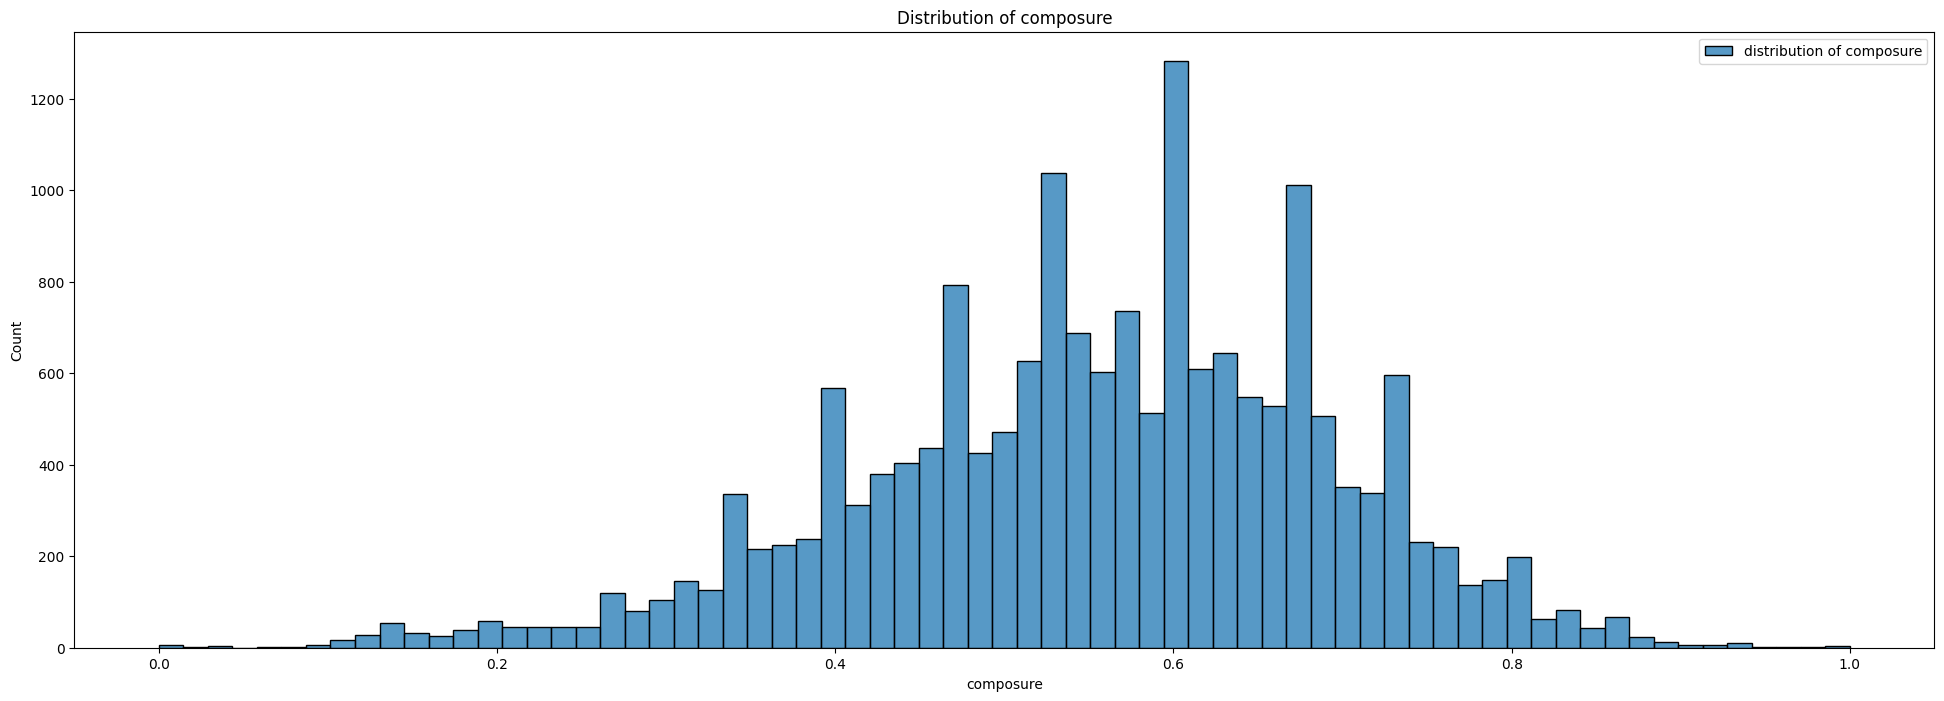

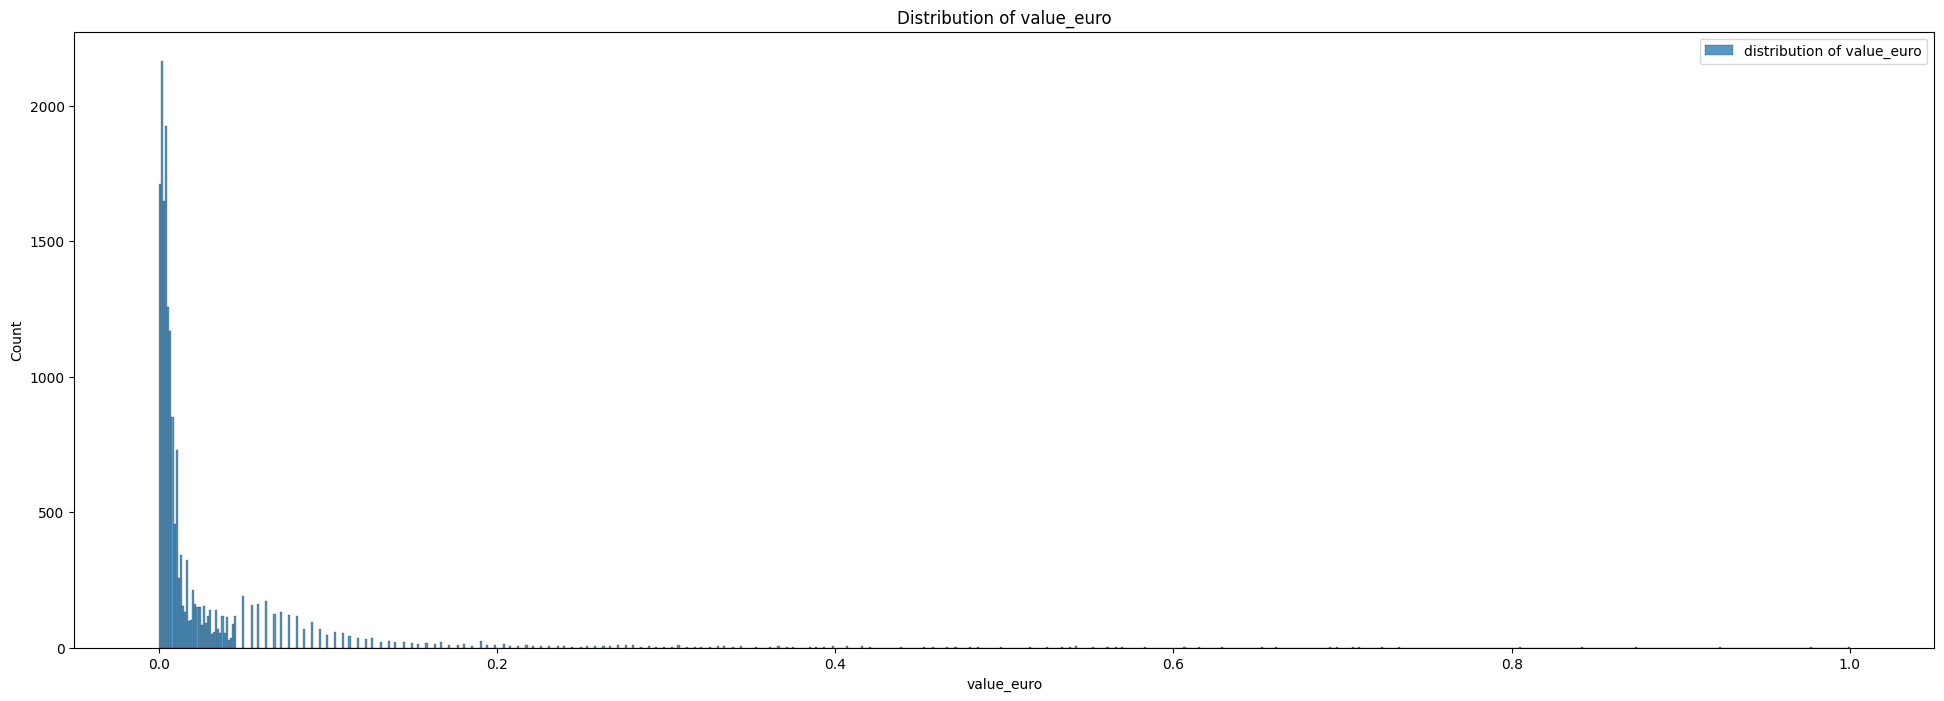

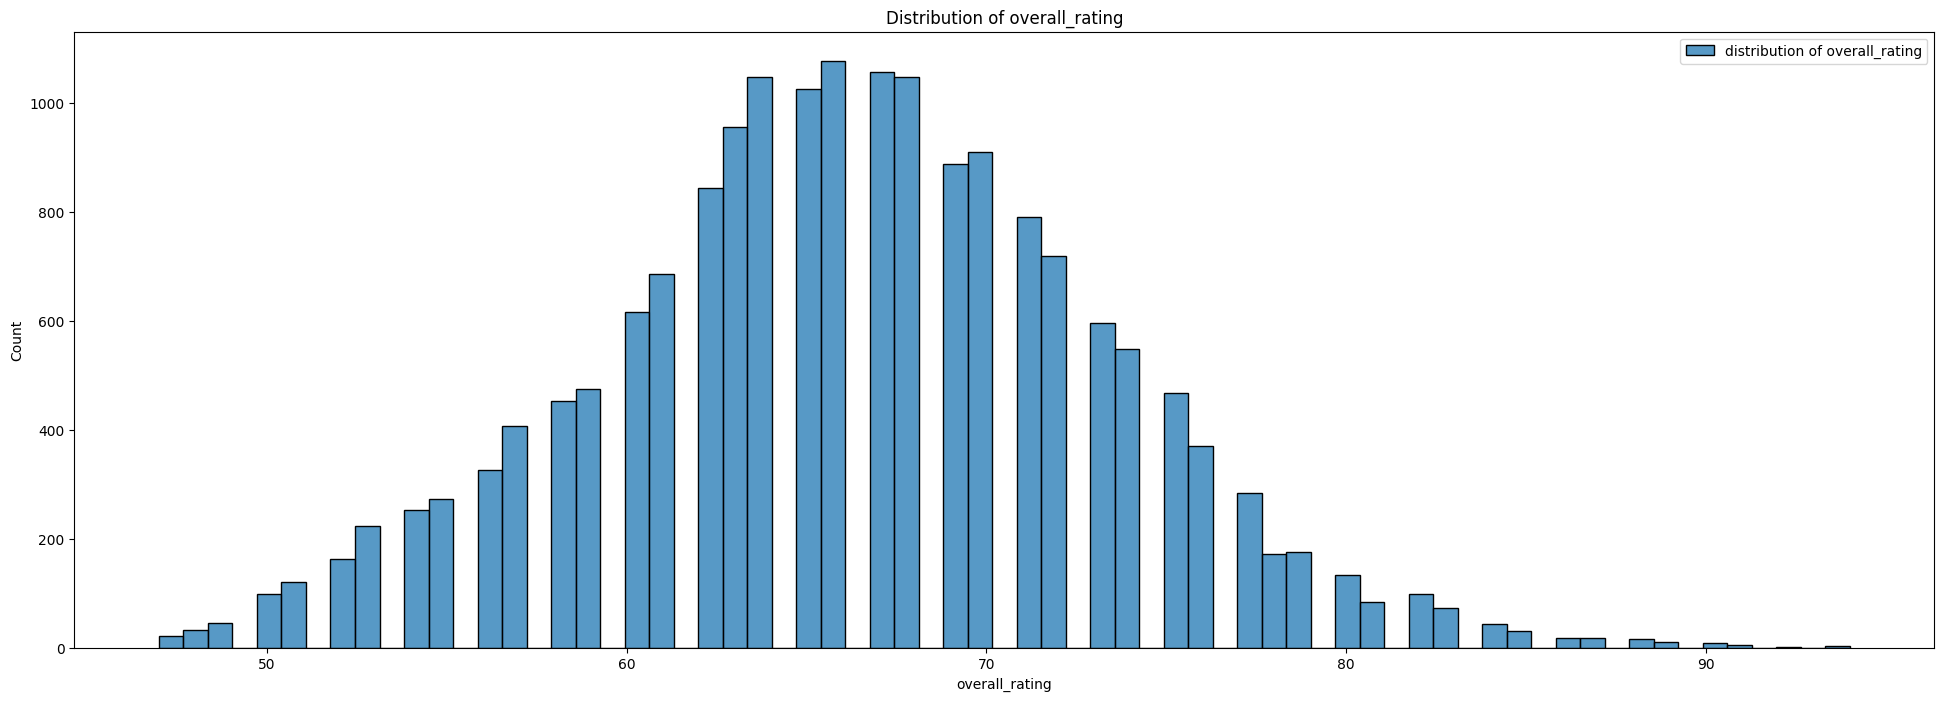

In [1977]:
for column in corr_df.columns:
    try:
        plt.figure(figsize=(24, 8))
        sns.histplot(x=corr_df[column], label=f'distribution of {column}')
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.show()
        plt.close()
    except Exception as e:
        print(e)


#### 2d. How correlated is the highley correlated data with respect to each other

In [1978]:
correlation_matrix = corr_df.corr()

print(correlation_matrix)

                reactions  composure  value_euro  overall_rating
reactions        1.000000   0.693352    0.547615        0.857014
composure        0.693352   1.000000    0.456538        0.731415
value_euro       0.547615   0.456538    1.000000        0.630928
overall_rating   0.857014   0.731415    0.630928        1.000000


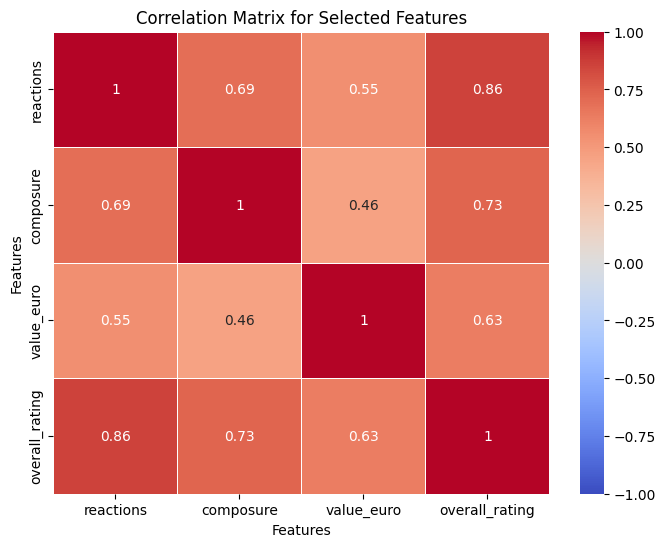

In [1979]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix for Selected Features')
plt.ylabel('Features')
plt.xlabel('Features')

plt.show()

#### 2e. boxplots

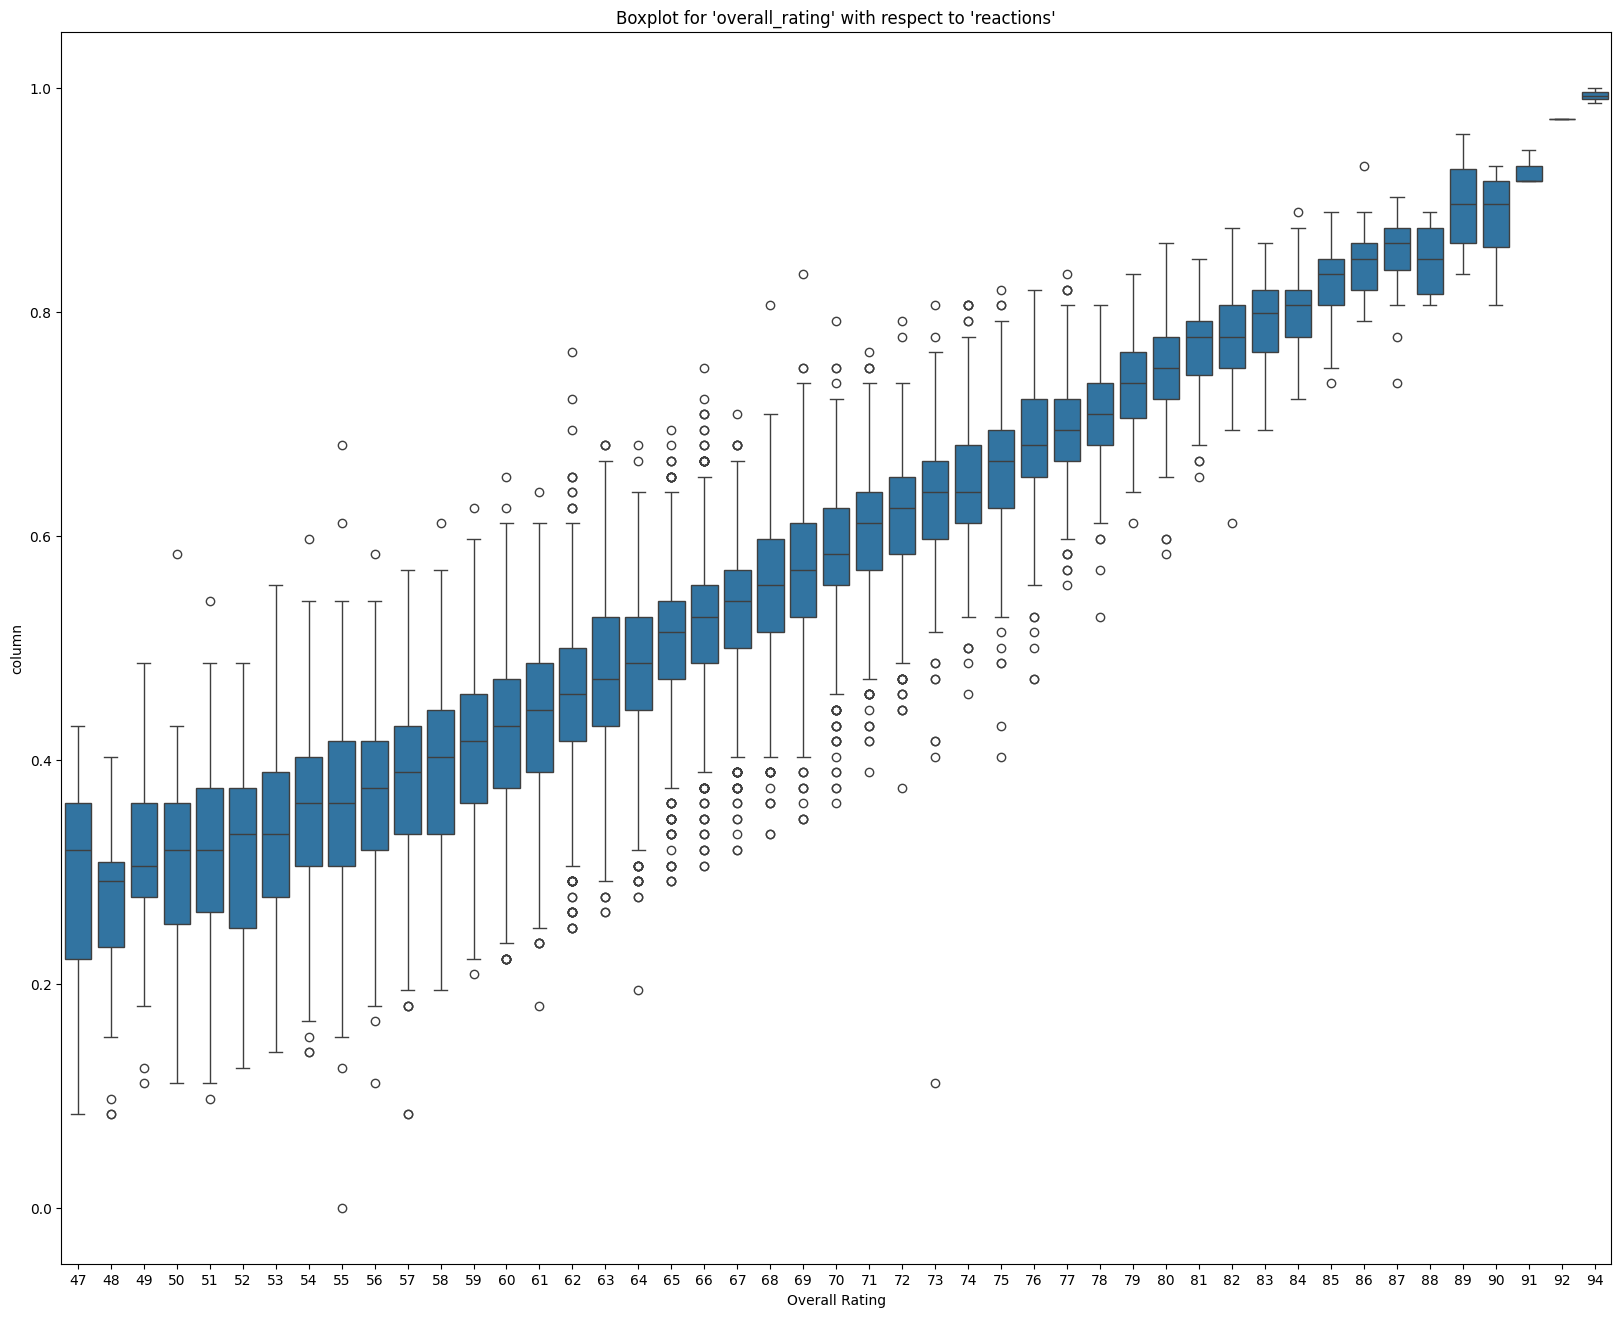

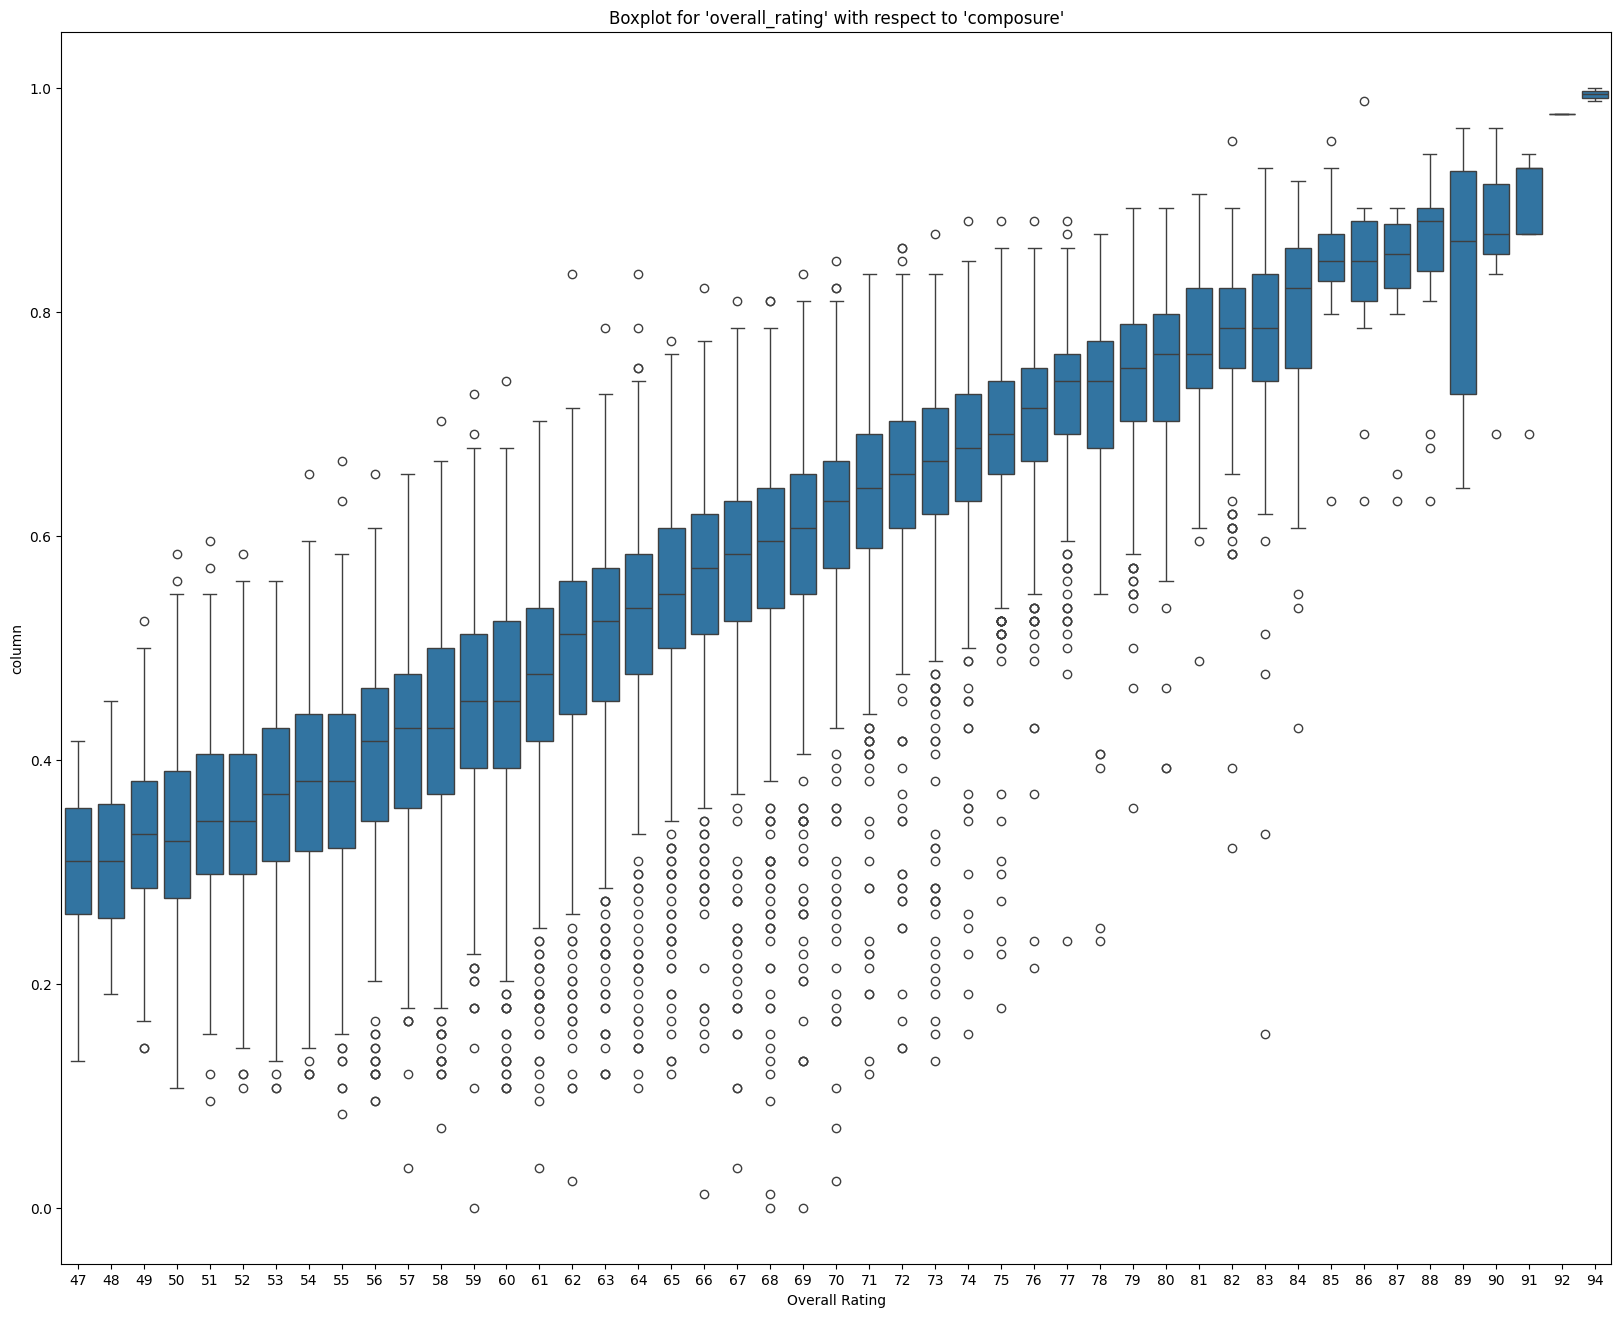

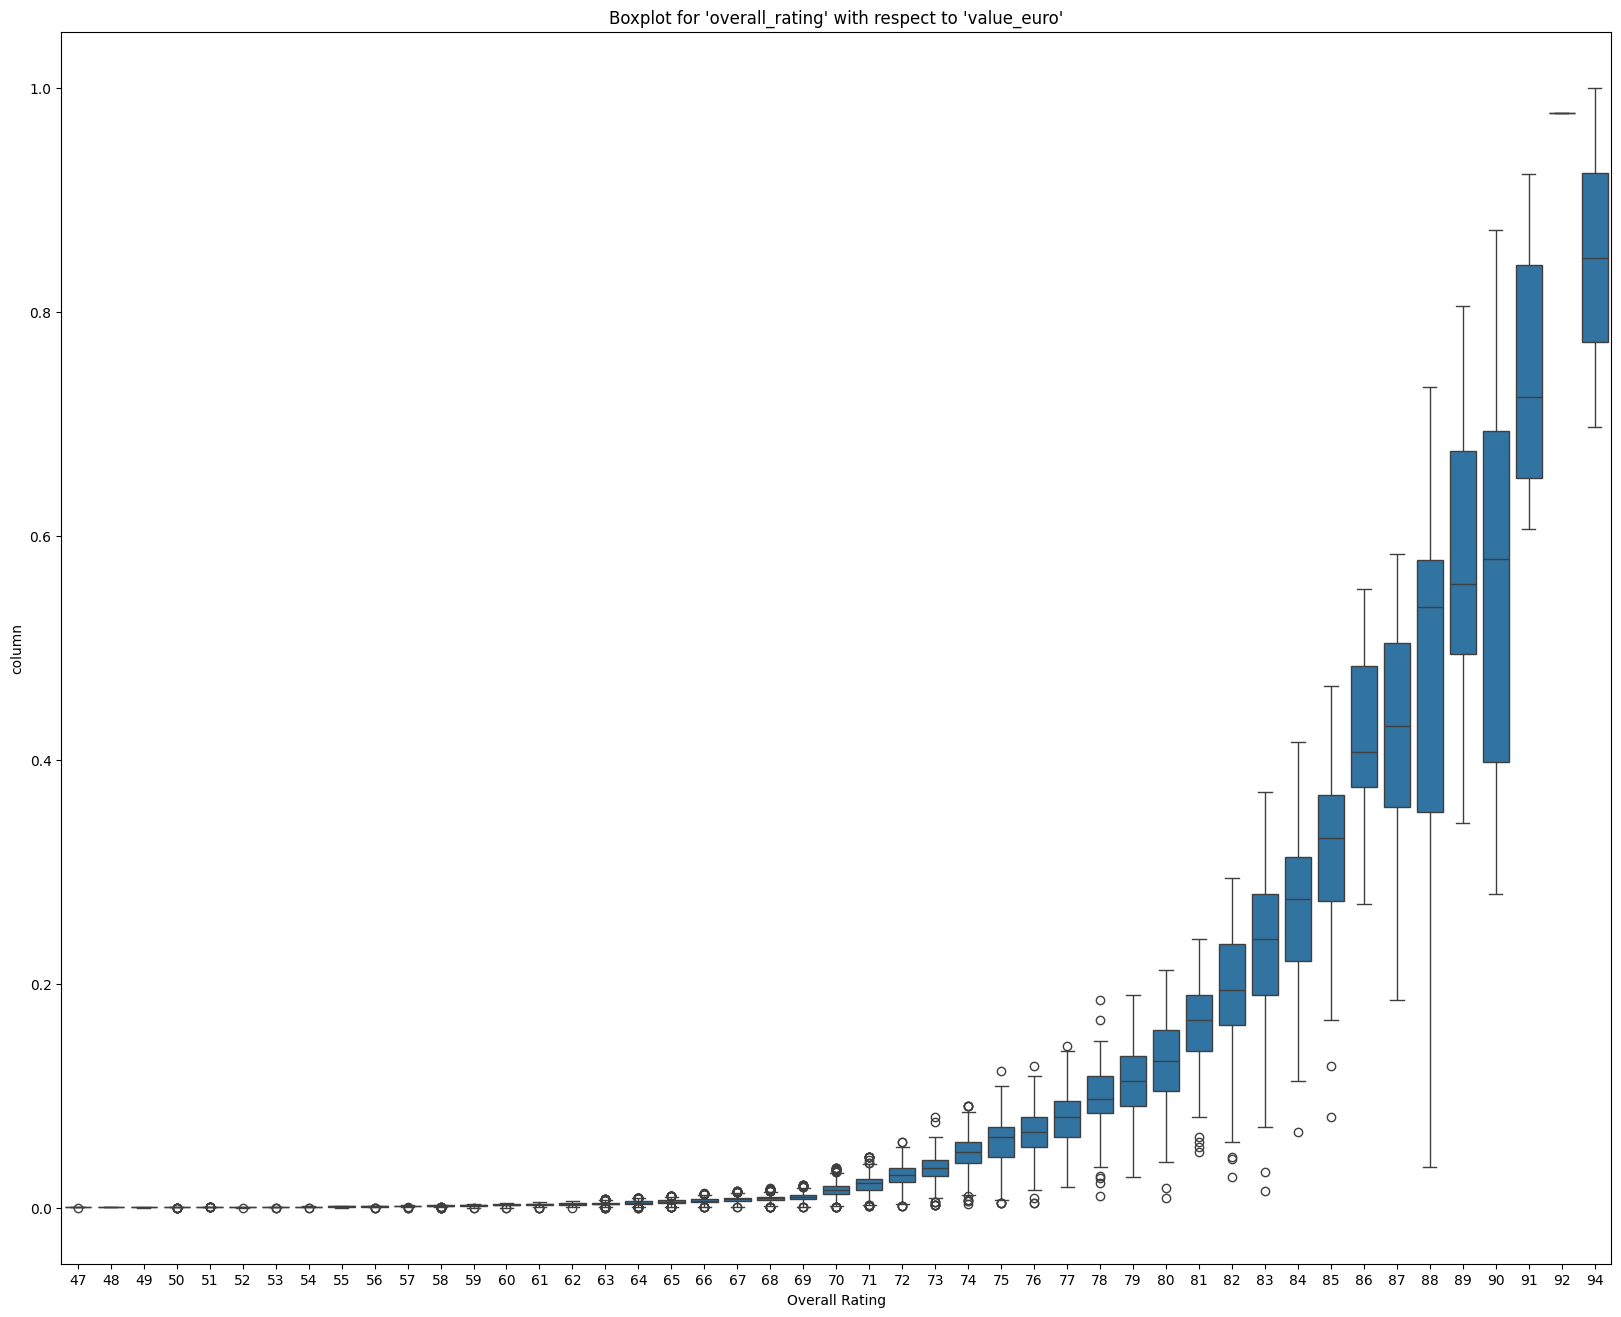

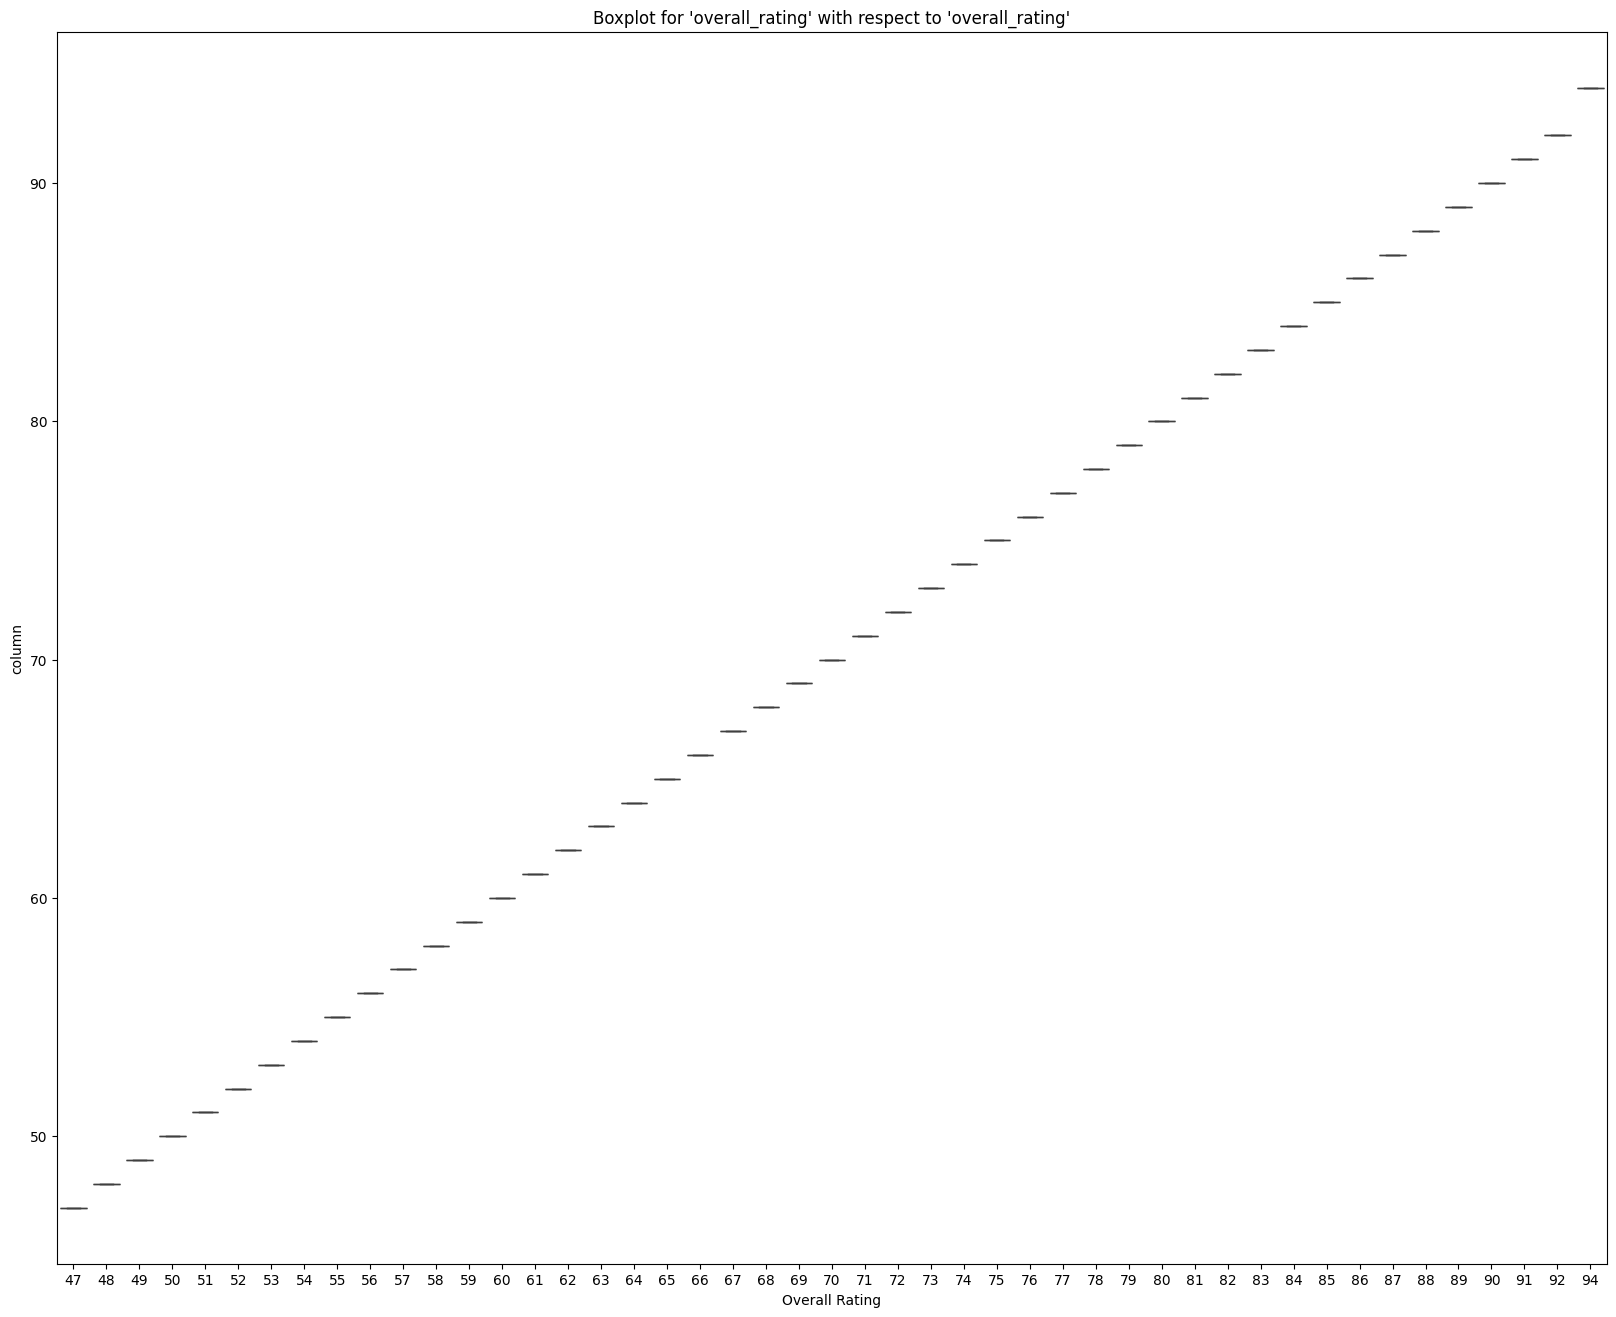

In [1982]:
for column in corr_df.columns:

    try:
        plt.figure(figsize=(20, 16))
        sns.boxplot(data=corr_df, x='overall_rating', y=column)
        plt.title(f"Boxplot for 'overall_rating' with respect to '{column}'")
        plt.xlabel('Overall Rating')
        plt.ylabel('column')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

### 3. What categories could affect the player value in euro

#### 3a. Player value with respect to their overall rating

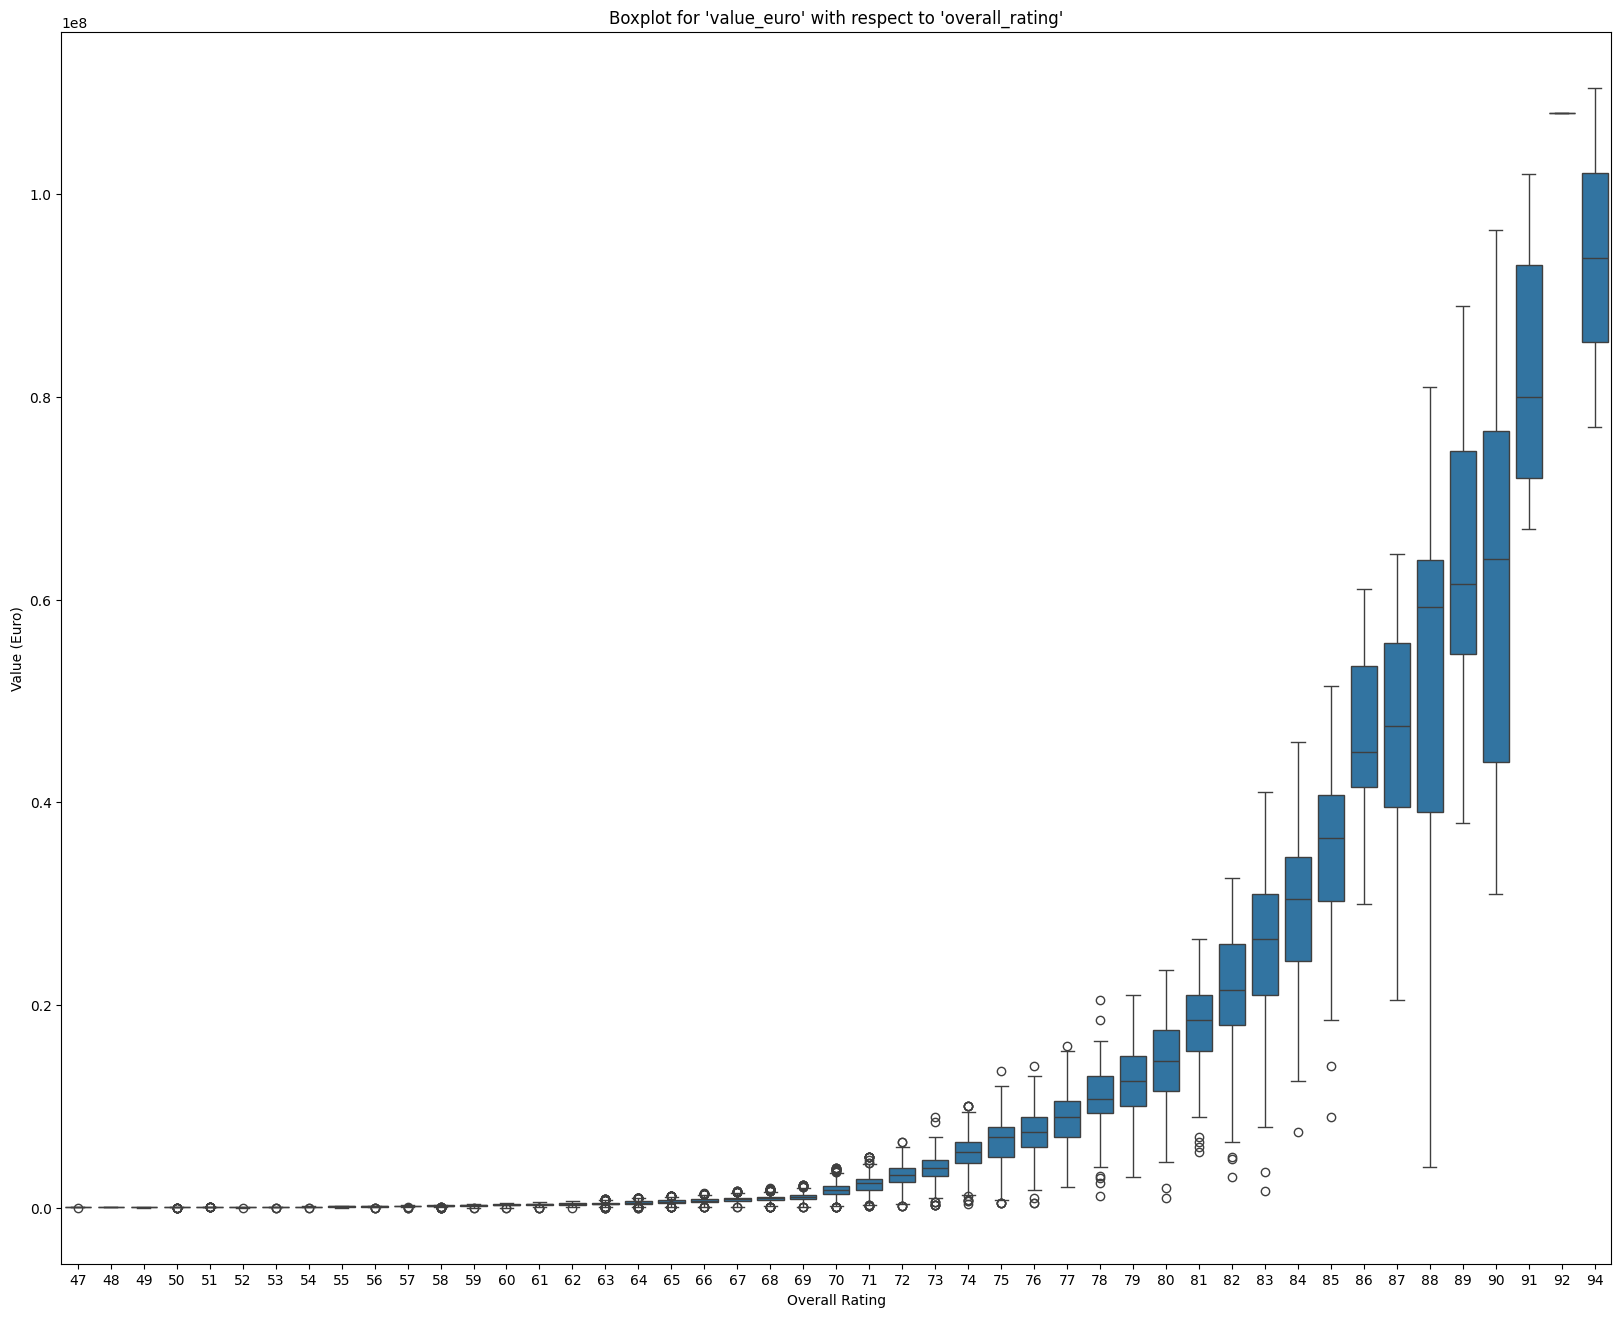

In [1980]:
# Create boxplots for 'overall_rating' and 'value_euro'
plt.figure(figsize=(20, 16))

# Boxplot for 'overall_rating'
sns.boxplot(data=df, x='overall_rating', y='value_euro')
plt.title("Boxplot for 'value_euro' with respect to 'overall_rating'")
plt.xlabel('Overall Rating')
plt.ylabel('Value (Euro)')
plt.show()

3b. Player value with respect to their age

In [1981]:
plt.figure(figsize=(20, 16))

sns.boxplot(data=new_df, x='age', y='value_bin')
plt.title("Boxplot for 'wage_bin' with respect to 'age'")
plt.xlabel('Age')
plt.ylabel('Wage_bin')

plt.show()

ValueError: Could not interpret value `value_bin` for `y`. An entry with this name does not appear in `data`.

<Figure size 2000x1600 with 0 Axes>

#### 3c. Player position with respect to their wage

In [ ]:
plt.figure(figsize=(20, 20))

sns.boxplot(data=df, x='Category', y='wage_bin')
plt.title("Boxplot for 'wage_bin' with respect to 'Category'")
plt.xlabel('Category')
plt.ylabel('wage_bin')


plt.show()


#### 3d. Player value with respect to the continent they belong in

In [ ]:
plt.figure(figsize=(20, 16))

sns.boxplot(data=df, x='continent', y='wage_bin')
plt.title("Boxplot for 'wage_bin' with respect to 'continent'")
plt.xlabel('Continent of origin')
plt.ylabel('Wage_bin')

plt.show()


#### 4. What is the nationality demographic of the dataset

# Section 6. Initial model training

## K-Nearest Neighbors Model

TODO: *Insert reason why we use this model here*

Importing relevant libraries

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Creating the train and test datasets using train_test_split. We set test_size to 0.3 as it is a pretty standard test size. We stratify based on y to ensure that the data is split evently between the classes. Shuffle is to help randomize the data for possibly better fitting. Random state set for reproducability.

In [ ]:
X_knn = normalized_df
y_knn = normalized_df.values[:, -2]

Standardize features using MinMaxScaler

In [ ]:
X_knn = MinMaxScaler().fit_transform(X_knn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, stratify=y_knn, random_state=42)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train[0])

See train and test split shape

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

Setup KNN Classifier and start fitting to the training data. For now, we will choose as arbitrary K value and distance metric that doesn't perform too badly

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, metric="euclidean", weights="uniform")
knn.fit(X_train, y_train)

Test model on training data 

In [ ]:
y_pred_train = knn.predict(X_train)
knn.score(X_train, y_train)

We got a "decent" accuracy on training data, let's check testing accuracy

Now, we test on the test data

In [ ]:
y_pred_test = knn.predict(X_test)
knn.score(X_test, y_test)

We got a similar accuracy on testing data, this means no overfitting or underfitting is occuring. Unfortunately, the accuracies aren't high in general, meaning the model isn't too useful.

Confusion matrix of results

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
print(classification_report(y_train, y_pred_train))

In [ ]:
print(classification_report(y_test, y_pred_test))

## Testing different hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [ ]:
neighbor_values = [1, 5, 10, 20, 40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="distance")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="distance")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

In [ ]:
neighbor_values = [1, 5, 10, 20,40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="uniform")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="uniform")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")


In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_dt = box_df_clean.drop("Class",axis=1)
y_dt = box_df_clean["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test data label counts:")
print(np.array([unique, counts]))

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
hyperparameters = [
   {
      'criterion': ['gini', 'entropy'],           
      'max_depth': [5, 10, 20, 30],               
      'min_samples_split': [2, 4, 6, 10, 15, 20, 30, 50],  
      'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500]
   }
]

In [ ]:
rsc_df = RandomizedSearchCV(estimator=dtc, 
                         param_distributions=hyperparameters,
                         n_iter=50,
                         cv=5,
                         random_state=42)

In [ ]:
rsc_df.best_params_

In [ ]:
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rsc_df.cv_results_)
rsc_results

In [ ]:
best_index = rsc_df.best_index_
best_index

In [ ]:
rsc_results.loc[best_index]

In [ ]:
best_acc = rsc_df.best_score_
best_acc

In [ ]:
predictions = dtc.predict(X_train)

In [ ]:
def compute_accuracy(predictions, actual):
   return sum(predictions == actual) / len(actual) * 100

In [ ]:
print("Training accuracy: ", compute_accuracy(predictions, y_train),"%")

In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
print("Testing accuracy: ", compute_accuracy(predictions, y_test),"%")

In [ ]:
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()

In [ ]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [ ]:
describe_tree(dtc)

# Log Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
X_dt = box_df_clean.drop(["Class","energy"],axis=1)
y_dt = box_df_clean["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
y_pred_train = log_reg.predict(X_train)

In [ ]:
y_pred_test = log_reg.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

In [ ]:
print("Accuracy Test:", accuracy_train)
print("\nClassification Report on Testing Data:\n", report_train)

In [ ]:
print("Accuracy Test:", accuracy_test)
print("\nClassification Report on Testing Data:\n", report_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues") 

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues") 

### Tuning the hyperparameter

In [ ]:
log_reg = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
param_grid = [
    # For 'liblinear' solver, which supports 'l1' and 'l2'
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'class_weight': ['balanced', None]},
    
    # For 'saga' solver, which supports 'l1' and 'l2'
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'class_weight': ['balanced', None]},
    
    # For 'newton-cg' solver, which supports only 'l2' penalty
    {'solver': ['newton-cg'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'class_weight': ['balanced', None]}
]

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues")